# Получение и представление данных в наборе
Набор содержит следующие столбцы:


1.   Вопрос - вопрос, заданный голосовому помощнику и респондентам
2.   Алиса...Афина - ответ одного из голосовых помощников
3.   woman/men - ответ одного из респондентов на поставленный вопрос



In [ ]:
import pandas as pd # библиотека для получения данных из таблицы excel
import numpy as np # библиотека для матричных вычислений
import matplotlib.pyplot as plt # библиотека для построения графиков
import seaborn as sns # библиотека для построения графиков

In [ ]:
data = pd.read_excel("/content/sample_data/ans.xlsx")
data.drop(data.columns[0], axis=1, inplace=True)
data = data.rename(columns={"men_0": "Мужчина_1",
                            "men_1": "Мужчина_2",
                            "woman_0": "Женщина_1",
                            "woman_1": "Женщина_2",
                            "woman_2": "Женщина_3"})

In [ ]:
data.head() #rename columns

Question  \
0                                Вы верите в судьбу?   
1          У вас есть любимый фильм и актёр из него?   
2  Какая книга вам нравится? Поделитесь впечатлен...   
3       Какая песня или музыка вам нравится? Почему?   
4      Какого вы знака Зодиака? Что вы о нём знаете?   

                                               Алиса  \
0  Я верю в удачу и в то, что, если стараться, мо...   
1  Мне нравятся фильмы с глубоким смыслом и сильн...   
2  Мне нравится «Мастер и Маргарита» Михаила Булг...   
3  Мне нравится песня Kendji Girac «Tiago», нежна...   
4  Водолей. Это знак стихии воздуха, который упра...   

                                                Сбер  \
0  Всё зависит от человека: если человек хочет че...   
1  «Интерстеллар», в этом фильме потрясающе всё: ...   
2  О технологическом будущем с юмором. Технологич...   
3  Я тут увлёкся джазом. Джаз в исполнении Кармен...   
4  Козерог, он символизирует целеустремлённость, ...   

                                                Джой  \
0  Судьба – совокупность всех событий и обстоятел...   
1  Да, мне нравится фильм «Мстители», хоть он для...   
2  Я люблю книги про Гарри Поттера, мне кажется, ...   
3  Я обожаю современную попсу, и, нет, не стыдно!...   
4  Я Лев, потому что люблю котиков. Лев – это же ...   

                                               Афина  \
0  Для меня это философская категория, которая оп...   
1  Мой самый любимый фантастический фильм «Интерс...   
2  Восхищена книгой «Семь навыков высокоэффективн...   
3  Там, где слова бессильны, выручает музыка. Сей...   
4  Дева, и он соответствует моему характеру, напр...   

                                           Женщина_1  \
0  Да, я верю в судьбу. В жизни иногда происходят...   
1  Как таковых любимых актёров нет, есть любимые ...   
2  «Бойцовский клуб» Чака Паланика. Нравится юмор...   
3  Я меломан. Мне нравится разная музыка: классик...   
4  Дева. Знаю, что рождённые под этим знаком скру...   

                                           Женщина_2  \
0  С одной стороны – верю, потому что есть событи...   
1                                 Нет, я не киноман.   
2  Мне нравятся антиутопии. Этот жанр читается ле...   
3  Я люблю джаз. Последнее время нравится совмеще...   
4  По знаку Зодиака я Скорпион. Знаю, что люди эт...   

                                           Женщина_3  \
0  Не особо. Иногда приятно придавать случайностя...   
1  Не могу выделить очень любимый фильм. Их много...   
2  Вся «Трилогия Крысы» у Харуки Мураками. Задева...   
3  Я не фанатка музыки, люблю иногда в дороге слу...   
4  Я Близнецы. Не очень разбираюсь в астрологии, ...   

                                           Мужчина_1  \
0  Не могу сказать, что не верю или верю полность...   
1  Мой любимый актёр – Дмитрий Журавлёв, он смешн...   
2  В данный момент мне нравятся книги Дарьи Бобыл...   
3           Мне нравится русский рэп. Он интересный.   
4  Близнецы. Находится чаще всего в первой полови...   

                                           Мужчина_2  
0                             А как в неё не верить?  
1  Фильм «Бегущий по лезвию», который способен по...  
2           «Дон Кихот» Сервантес. Я плакал в конце.  
3  Эннио Морриконе. Многие его композиции бьют им...  
4  Я Близнецы. Знаю, что мы двуличные и непостоян...

In [ ]:
!pip install sentence-transformers

# Часть первая. Анализ ответов мужчин и голосовых помощников.
Реализованы эмбеддинги входных предложений, оценена семантическая близость с помощью косинусного расстояния:
<tex>$similarity=cos(Θ)=\frac{A * B}{\|A\|\|B\|}, A, B  \in {R^n}$<tex>

In [ ]:
from sentence_transformers import SentenceTransformer, util

#Загружаем модель SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
#Рассчитываем эмбеддинги ответов голосовых помощников и респондентов
datasets = ["Алиса", "Сбер", "Джой", "Афина", "Мужчина_1", "Мужчина_2", "Женщина_1", "Женщина_2", "Женщина_3"]
embeddings = {}
for dataset_name in datasets:
  embeddings[dataset_name] = model.encode(data[dataset_name])


In [ ]:
def calculate_cos_sim(embed_mach: np.ndarray, embed_human: np.ndarray) -> np.ndarray:
  '''
  Функция для рассчета косинусного сходства между двумя эмбеддингами
  '''
  cos_sim = np.empty(len(embed_mach))
  for i, (embed_1, embed_2) in enumerate(zip(embed_mach, embed_human)):
    cos_sim[i] = util.cos_sim(embed_1, embed_2)
  return cos_sim

In [ ]:
data_cos_sim_cols = ["Алиса_Мужчина_1", "Алиса_Мужчина_2",
                     "Сбер_Мужчина_1", "Сбер_Мужчина_2",
                     "Джой_Мужчина_1", "Джой_Мужчина_2",
                     "Афина_Мужчина_1", "Афина_Мужчина_2",
                     "Алиса_Женщина_1", "Алиса_Женщина_2", "Алиса_Женщина_3",
                     "Сбер_Женщина_1", "Сбер_Женщина_2", "Сбер_Женщина_3",
                     "Афина_Женщина_1", "Афина_Женщина_2", "Афина_Женщина_3",
                     "Джой_Женщина_1", "Джой_Женщина_2", "Джой_Женщина_3"]
'''
Обнавляем DataFrame колонками, содержащими информацию о косинусном сходстве
между ответами голосового помощника и мужчины
'''
for column_name in data_cos_sim_cols:
  src_embed_names = column_name.split("_", 1)
  data[column_name] = calculate_cos_sim(embeddings[src_embed_names[0]], embeddings[src_embed_names[1]])


data.head()


Question  \
0                                Вы верите в судьбу?   
1          У вас есть любимый фильм и актёр из него?   
2  Какая книга вам нравится? Поделитесь впечатлен...   
3       Какая песня или музыка вам нравится? Почему?   
4      Какого вы знака Зодиака? Что вы о нём знаете?   

                                               Алиса  \
0  Я верю в удачу и в то, что, если стараться, мо...   
1  Мне нравятся фильмы с глубоким смыслом и сильн...   
2  Мне нравится «Мастер и Маргарита» Михаила Булг...   
3  Мне нравится песня Kendji Girac «Tiago», нежна...   
4  Водолей. Это знак стихии воздуха, который упра...   

                                                Сбер  \
0  Всё зависит от человека: если человек хочет че...   
1  «Интерстеллар», в этом фильме потрясающе всё: ...   
2  О технологическом будущем с юмором. Технологич...   
3  Я тут увлёкся джазом. Джаз в исполнении Кармен...   
4  Козерог, он символизирует целеустремлённость, ...   

                                                Джой  \
0  Судьба – совокупность всех событий и обстоятел...   
1  Да, мне нравится фильм «Мстители», хоть он для...   
2  Я люблю книги про Гарри Поттера, мне кажется, ...   
3  Я обожаю современную попсу, и, нет, не стыдно!...   
4  Я Лев, потому что люблю котиков. Лев – это же ...   

                                               Афина  \
0  Для меня это философская категория, которая оп...   
1  Мой самый любимый фантастический фильм «Интерс...   
2  Восхищена книгой «Семь навыков высокоэффективн...   
3  Там, где слова бессильны, выручает музыка. Сей...   
4  Дева, и он соответствует моему характеру, напр...   

                                           Женщина_1  \
0  Да, я верю в судьбу. В жизни иногда происходят...   
1  Как таковых любимых актёров нет, есть любимые ...   
2  «Бойцовский клуб» Чака Паланика. Нравится юмор...   
3  Я меломан. Мне нравится разная музыка: классик...   
4  Дева. Знаю, что рождённые под этим знаком скру...   

                                           Женщина_2  \
0  С одной стороны – верю, потому что есть событи...   
1                                 Нет, я не киноман.   
2  Мне нравятся антиутопии. Этот жанр читается ле...   
3  Я люблю джаз. Последнее время нравится совмеще...   
4  По знаку Зодиака я Скорпион. Знаю, что люди эт...   

                                           Женщина_3  \
0  Не особо. Иногда приятно придавать случайностя...   
1  Не могу выделить очень любимый фильм. Их много...   
2  Вся «Трилогия Крысы» у Харуки Мураками. Задева...   
3  Я не фанатка музыки, люблю иногда в дороге слу...   
4  Я Близнецы. Не очень разбираюсь в астрологии, ...   

                                           Мужчина_1  \
0  Не могу сказать, что не верю или верю полность...   
1  Мой любимый актёр – Дмитрий Журавлёв, он смешн...   
2  В данный момент мне нравятся книги Дарьи Бобыл...   
3           Мне нравится русский рэп. Он интересный.   
4  Близнецы. Находится чаще всего в первой полови...   

                                           Мужчина_2  ...  Алиса_Женщина_3  \
0                             А как в неё не верить?  ...         0.716801   
1  Фильм «Бегущий по лезвию», который способен по...  ...         0.800320   
2           «Дон Кихот» Сервантес. Я плакал в конце.  ...         0.666852   
3  Эннио Морриконе. Многие его композиции бьют им...  ...         0.446949   
4  Я Близнецы. Знаю, что мы двуличные и непостоян...  ...         0.603973   

   Сбер_Женщина_1  Сбер_Женщина_2  Сбер_Женщина_3  Афина_Женщина_1  \
0        0.629132        0.743969        0.666127         0.523513   
1        0.728432        0.284294        0.774472         0.630000   
2        0.538994        0.396960        0.629792         0.627832   
3        0.540728        0.529002        0.548874         0.474926   
4        0.672052        0.570773        0.640503         0.593423   

   Афина_Женщина_2  Афина_Женщина_3  Джой_Женщина_1  Джой_Женщина_2  \
0         0.600599         0.552191        0.71390

In [ ]:
data

Question  \
0                                  Вы верите в судьбу?   
1            У вас есть любимый фильм и актёр из него?   
2    Какая книга вам нравится? Поделитесь впечатлен...   
3         Какая песня или музыка вам нравится? Почему?   
4        Какого вы знака Зодиака? Что вы о нём знаете?   
..                                                 ...   
145  Опишите ситуацию, которую можно охарактеризова...   
146  Опишите ситуацию, которую можно охарактеризова...   
147  Опишите ситуацию, которую можно охарактеризова...   
148  Опишите ситуацию, которую можно охарактеризова...   
149  Опишите ситуацию, которую можно охарактеризова...   

                                                 Алиса  \
0    Я верю в удачу и в то, что, если стараться, мо...   
1    Мне нравятся фильмы с глубоким смыслом и сильн...   
2    Мне нравится «Мастер и Маргарита» Михаила Булг...   
3    Мне нравится песня Kendji Girac «Tiago», нежна...   
4    Водолей. Это знак стихии воздуха, который упра...   
..                                                 ...   
145  Ситуацию, которую можно охарактеризовать как «...   
146  Ситуация «25/8» характеризуется чрезмерной зан...   
147  Замкнутый круг – эта ситуация, когда одно собы...   
148  «Кануть в Лету» значит исчезнуть навсегда, уйт...   
149  Ситуация, которую можно охарактеризовать как «...   

                                                  Сбер  \
0    Всё зависит от человека: если человек хочет че...   
1    «Интерстеллар», в этом фильме потрясающе всё: ...   
2    О технологическом будущем с юмором. Технологич...   
3    Я тут увлёкся джазом. Джаз в исполнении Кармен...   
4    Козерог, он символизирует целеустремлённость, ...   
..                                                 ...   
145                                  Это слабое место.   
146  Это пропускная способность канала связи? «25/8...   
147  Ситуация, когда невозможно выйти из какого-то ...   
148                    Это значит исчезнуть, пропасть.   
149  Я бы предпочёл, чтобы мои собеседники не испол...   

                                                  Джой  \
0    Судьба – совокупность всех событий и обстоятел...   
1    Да, мне нравится фильм «Мстители», хоть он для...   
2    Я люблю книги про Гарри Поттера, мне кажется, ...   
3    Я обожаю современную попсу, и, нет, не стыдно!...   
4    Я Лев, потому что люблю котиков. Лев – это же ...   
..                                                 ...   
145  Это слабое место или неудача, например, отсутс...   
146                 При делении 25 на 8 поучается 3,5.   
147  Когда ты делаешь одно и то же действие, но рез...   
148                        Как будто ничего и не было.   
149  Полагаю, это значит, что человек очень зол или...   

                                                 Афина  \
0    Для меня это философская категория, которая оп...   
1    Мой самый любимый фантастический фильм «Интерс...   
2    Восхищена книгой «Семь навыков высокоэффективн...   
3    Там, где слова бессильны, выручает музыка. Сей...   
4    Дева, и он соответствует моему характеру, напр...   
..                                                 ...   
145  Эту историю любил рассказывать физик Сергей Пе...   
146                   Это дробь, которая означает 3/8.   
147  Это ситуация, когда невозможно найти выход из-...   
148                    Когда человек теряется в толпе.   
149  «За смертью посылать» – это метафора, использу...   

                                             Женщина_1  \
0    Да, я верю в судьбу. В жизни иногда происходят...   
1    Как таковых любимых актёров нет, есть любимые ...   
2    «Бойцовский клуб» Чака Паланика. Нравится юмор...   
3    Я меломан. Мне нравится разная музыка: классик...   
4    Дева. Знаю, что рождённые под этим знаком скру...   
..                                                 ...   
145  Например, когда человек не умеет обращаться с ...   
146                                         Моя учёба.   
147  Любая бытовая задача вроде готовки

In [ ]:
#Рассчитываем среднее между ответом мужчины и голосового ассистента
print(f"Среднее по всем ответам:\n {data.select_dtypes(include=['float']).mean()}")

Среднее по всем ответам:
 Алиса_Мужчина_1    0.600388
Алиса_Мужчина_2    0.617729
Сбер_Мужчина_1     0.575900
Сбер_Мужчина_2     0.598542
Джой_Мужчина_1     0.580551
Джой_Мужчина_2     0.578569
Афина_Мужчина_1    0.598903
Афина_Мужчина_2    0.615205
Алиса_Женщина_1    0.630663
Алиса_Женщина_2    0.623193
Алиса_Женщина_3    0.623654
Сбер_Женщина_1     0.584113
Сбер_Женщина_2     0.590173
Сбер_Женщина_3     0.588457
Афина_Женщина_1    0.613719
Афина_Женщина_2    0.610290
Афина_Женщина_3    0.586922
Джой_Женщина_1     0.581889
Джой_Женщина_2     0.599130
Джой_Женщина_3     0.587114
dtype: float64


In [ ]:
#Общее среднее
print(f"Общее среднее = {data.select_dtypes(include=['float']).mean().mean()}")

Общее среднее = 0.599255127089719


Выделим несколько максимально схожих ответов среди каждого голосового ассистента и мужчины.

In [ ]:
sorted_data_alice_0 = data.sort_values('Алиса_Мужчина_1', ascending=False)[['Question', 'Алиса', 'Мужчина_1', 'Алиса_Мужчина_1']]
sorted_data_alice_0 = sorted_data_alice_0.loc[(sorted_data_alice_0['Alice_men_0'] > 0.55)]
sorted_data_alice_0.to_excel("Алиса_мужчина1_макс.xlsx")
sorted_data_alice_0

Question  \
110                     Продолжите: «С большой силой…»   
109                   Продолжите: «Мы пойдём с конём…»   
118                Продолжите: «Скажи-ка, дядя, ведь…»   
112              Продолжите: «Поступай с другими так…»   
126           Дайте определение: киндер сюрприз – это…   
117                   Продолжите: «Прекрасное далёко…»   
113                           Продолжите: «Без труда…»   
30   Считаете ли вы, что семья – это главная ценнос...   
116            Продолжите: «Две мясные котлеты гриль…»   
11   Назовите 10 положительных черт своего характер...   
123            Дайте определение: душа компании – это…   
105                 Что было раньше – курица или яйцо?   
104  Почему волонтёрство это хорошо? Бывают ли случ...   
121       Дайте определение: механизмы мышления – это…   
86                   Что значит для вас соперничество?   
78                          Что значит для вас дружба?   
61   Вы строги по отношению к другим или по отношен...   
38                        Как можно не ценить свободу?   
103  Какой шоколад вкуснее: молочный, горький или в...   
73      Какое у вас любимое домашнее животное? Почему?   
80                   Что значит для вас привязанность?   
31      Кем быть лучше – интровертом или экстравертом?   
56    Вкладываете ли вы в подарок особый смысл? Какой?   
100          С чем у вас ассоциируется память? Почему?   
92         С чем у вас ассоциируется зарплата? Почему?   
119                     Продолжите: «В лесу родилась…»   
75       Сколько можно мучиться и когда всё получится?   
135  Почему, по вашему мнению, люди часто выбирают ...   
120             Дайте определение: акула из ИКЕА– это…   
10    Что вам обычно снится? Как вы относитесь к снам?   
26             Вам легко говорить людям правду в лицо?   
125             Дайте определение: Вечный огонь – это…   
72                                  Кто такой душнила?   
93              С чем у вас ассоциируется чай? Почему?   
6    Что вы думаете об искусственном интеллекте? Пр...   
130  Зафрендить незнакомого человека Вконтакте – эт...   
84                  Верите ли вы в жизнь после смерти?   
37                            Для учения нет старости?   
97       С чем у вас ассоциируется белый лист? Почему?   
48        Какой рукой лучше размешивать чай с сахаром?   
2    Какая книга вам нравится? Поделитесь впечатлен...   
22                      Вы чаще говорите или слушаете?   
115                  Продолжите: «Ням, ням, ням, ням…»   
27       Вам бы хотелось написать книгу о своей жизни?   
47                  По какому пути ещё никто не ходил?   
25      Смысл жизни нужно искать или создавать самому?   
76   Если бы у вас была возможность узнать, сколько...   
34          Что бы вам хотелось изменить в нашем мире?   
39    Что будет, если мы продолжим идти по этому пути?   
28          Вы верите в силу мысли и законы Вселенной?   
137  Часто ли люди вокруг вас фейспалмят? Если да, ...   
3         Какая песня или музыка вам нравится? Почему?   
0                                  Вы верите в судьбу?   
140  Опишите ситуацию, которую можно охарактеризова...   
40                    Кто не мечтает о лучшем будущем?   
122             Дайте определение: золотые руки – это…   
87                   Что значит для вас толерантность?   

                                                 Алиса  \
110              «… приходит большая ответственность».   
109                                 «…по полю вдвоём».   
118  «… недаром Москва, спалённая пожаром, французу...   
112        «…как хочешь, чтобы они поступали с тобой».   
126               … шоколадное яйцо с игрушкой внутри.   
117  «…не будь ко мне жестоко, не будь ко мне жесто...   
113                   «…не вытащишь и рыбку из пруда».   
30   Да, я считаю, что семья – это самое важное в ж...   
116  «…специальный соус, сыр, огурцы, салат и лук –...   
11   Дружелюбие, отзывчивость, терпеливость, ответс...   
123  …человек, который легко вливается в лю

In [ ]:
sorted_data_alice_1 = data.sort_values('Alice_men_1', ascending=False)[['Question', 'Алиса', 'men_1', 'Alice_men_1']]
sorted_data_alice_1 = sorted_data_alice_1.loc[(sorted_data_alice_1['Alice_men_1'] > 0.55)]
sorted_data_alice_1.to_excel("Алиса_мужчина2_макс.xlsx")
sorted_data_alice_1

Question  \
110                     Продолжите: «С большой силой…»   
118                Продолжите: «Скажи-ка, дядя, ведь…»   
109                   Продолжите: «Мы пойдём с конём…»   
113                           Продолжите: «Без труда…»   
126           Дайте определение: киндер сюрприз – это…   
..                                                 ...   
79                          Что значит для вас любовь?   
105                 Что было раньше – курица или яйцо?   
14                       Как вы относитесь к политике?   
131  Вы скипаете рекламу, когда смотрите видео в Ин...   
47                  По какому пути ещё никто не ходил?   

                                                 Алиса  \
110              «… приходит большая ответственность».   
118  «… недаром Москва, спалённая пожаром, французу...   
109                                 «…по полю вдвоём».   
113                   «…не вытащишь и рыбку из пруда».   
126               … шоколадное яйцо с игрушкой внутри.   
..                                                 ...   
79   Любовь – это когда стучишь в дверь со словами ...   
105  Мне кажется, что и курица, и яйцо появились од...   
14   Я стараюсь быть объективной и не хочу давать о...   
131  Я не могу смотреть видео в Интернете, но если ...   
47           По пути, который вы только что придумали.   

                                                 men_1  Alice_men_1  
110              «… приходит большая ответственность».     1.000000  
118  «… недаром Москва, спалённая пожаром, французу...     1.000000  
109                                 «…по полю вдвоём».     1.000000  
113                   «…не вытащишь и рыбки из пруда».     0.982306  
126          …шоколадка в виде яйца с игрушкой внутри.     0.952751  
..                                                 ...          ...  
79   Любовь для меня – личное и чувственное общение...     0.570637  
105  Как говорил мой дед, не знаю, но курицу явно к...     0.563401  
14                        Стараюсь жить по её законам.     0.555304  
131                Стараюсь скипнуть как можно скорее.     0.552529  
47                                      Неизведанному.     0.552251  

[113 rows x 4 columns]

In [ ]:
sorted_data_sber_0 = data.sort_values('Sber_men_0', ascending=False)[['Question', 'Сбер', 'men_0', 'Sber_men_0']]
sorted_data_sber_0 = sorted_data_sber_0.loc[(sorted_data_sber_0['Sber_men_0'] > 0.55)]
sorted_data_sber_0.to_excel("Сбер_мужчина1_макс.xlsx")
sorted_data_sber_0

Question  \
112              Продолжите: «Поступай с другими так…»   
126           Дайте определение: киндер сюрприз – это…   
113                           Продолжите: «Без труда…»   
119                     Продолжите: «В лесу родилась…»   
30   Считаете ли вы, что семья – это главная ценнос...   
..                                                 ...   
92         С чем у вас ассоциируется зарплата? Почему?   
69   Вы всегда можете найти тему для разговора даже...   
122             Дайте определение: золотые руки – это…   
120             Дайте определение: акула из ИКЕА– это…   
71    У вас есть собственное мнение по любому вопросу?   

                                                  Сбер  \
112  «…как хочешь, чтобы они поступали с тобой». Эт...   
126  …шоколадное яйцо, внутри которого находится иг...   
113                     «…не выловишь рыбку из пруда».   
119                            …очаровательная елочка.   
30   Я считаю, что семья — это очень важно, но есть...   
..                                                 ...   
92   Я работаю в Сбере, но денег не получаю. Такой ...   
69                Мне нравится узнавать новое о людях.   
122  Термин «золотые руки» обычно используется для ...   
120  Блохэй, или акула из ИКЕА – это плюшевая игруш...   
71   Хм, есть у меня одно правило: коллег хвалили и...   

                                                 men_0  Sber_men_0  
112            «…как хочешь, чтобы поступали с тобой».    0.944176  
126                   …шоколад в виде яйца с игрушкой.    0.876354  
113                            «…нет и рыбы из пруда».    0.838068  
119                                          …ёлочка».    0.811933  
30   Скорее да, потому что семья – это не просто об...    0.736945  
..                                                 ...         ...  
92   Зарплата ассоциируется у меня с радостью, пото...    0.562881  
69                           Не уверен, но будто «да».    0.562623  
122                                …способный человек.    0.560014  
120  …мягкая игрушка, которая популярна у молодых л...    0.554325  
71               Да, иногда оно звучит от уст другого.    0.550110  

[96 rows x 4 columns]

In [ ]:
sorted_data_sber_1 = data.sort_values('Sber_men_1', ascending=False)[['Question', 'Сбер', 'men_1', 'Sber_men_1']]
sorted_data_sber_1 = sorted_data_sber_1.loc[(sorted_data_sber_1['Sber_men_1'] > 0.55)]
sorted_data_sber_1.to_excel("Сбер_мужчина2_макс.xlsx")
sorted_data_sber_1

Question  \
111                   Продолжите: «Выходила на берег…»   
126           Дайте определение: киндер сюрприз – это…   
113                           Продолжите: «Без труда…»   
112              Продолжите: «Поступай с другими так…»   
100          С чем у вас ассоциируется память? Почему?   
..                                                 ...   
71    У вас есть собственное мнение по любому вопросу?   
52                      Кем вы хотели стать в детстве?   
31      Кем быть лучше – интровертом или экстравертом?   
117                   Продолжите: «Прекрасное далёко…»   
5    Что общего между мужчиной и жениной? Чем отлич...   

                                                  Сбер  \
111                                        «… Катюша».   
126  …шоколадное яйцо, внутри которого находится иг...   
113                     «…не выловишь рыбку из пруда».   
112  «…как хочешь, чтобы они поступали с тобой». Эт...   
100  С огромной библиотекой, потому что там хранитс...   
..                                                 ...   
71   Хм, есть у меня одно правило: коллег хвалили и...   
52   Я хотел быть космонавтом, это же такая же увле...   
31   Каждый человек хорош по-своему. Я интроверт, н...   
117  …большой детский хор Всесоюзного радио и центр...   
5    У них есть руки, ноги и голова, а ещё они оба ...   

                                                 men_1  Sber_men_1  
111                                        «… Катюша».    1.000000  
126          …шоколадка в виде яйца с игрушкой внутри.    0.915681  
113                   «…не вытащишь и рыбки из пруда».    0.887344  
112          «…как бы ты сам желал поступить с собой».    0.809567  
100       С прошлым и важным для будущего информацией.    0.809429  
..                                                 ...         ...  
71   К сожалению, нет. Я не знаю всего и не на всё ...    0.575157  
52                 В детстве я хотел стать дизайнером.    0.572448  
31                          Я думаю, лучше быть собой.    0.566645  
117                         «…не будь ко мне жестоко».    0.564579  
5    Мужчины и женщины – люди, это общее для них. О...    0.556892  

[100 rows x 4 columns]

In [ ]:
sorted_data_joy_0 = data.sort_values('Joy_men_0', ascending=False)[['Question', 'Джой', 'men_0', 'Joy_men_0']]
sorted_data_joy_0 = sorted_data_joy_0.loc[(sorted_data_joy_0['Joy_men_0'] > 0.55)]
sorted_data_joy_0.to_excel("Джой_мужчина1_макс.xlsx")
sorted_data_joy_0

Question  \
112       Продолжите: «Поступай с другими так…»   
113                    Продолжите: «Без труда…»   
105          Что было раньше – курица или яйцо?   
28   Вы верите в силу мысли и законы Вселенной?   
126    Дайте определение: киндер сюрприз – это…   
108                    Продолжите: «Язык есть…»   

                                                  Джой  \
112        «…как хочешь, чтобы они поступали с тобой».   
113                   «…не вытащишь и рыбку из пруда».   
105  Согласно современным взглядам, яйцо появилось ...   
28   Конечно, я верю в силу мысли, но больше в зако...   
126  …торговая марка итальянской компании «Ферреро»...   
108                                      … а слов нет.   

                                                 men_0  Joy_men_0  
112            «…как хочешь, чтобы поступали с тобой».   0.913784  
113                            «…нет и рыбы из пруда».   0.891318  
105  Яйцо, ибо курица — это вид появившийся эволюци...   0.716023  
28   В физические законы вселенной – да, в силу мыс...   0.633144  
126                   …шоколад в виде яйца с игрушкой.   0.562107  
108                                     …а чести нету.   0.558901

In [ ]:
sorted_data_joy_1 = data.sort_values('Joy_men_1', ascending=False)[['Question', 'Джой', 'men_1', 'Joy_men_1']]
sorted_data_joy_1 = sorted_data_joy_1.loc[(sorted_data_joy_1['Joy_men_1'] > 0.55)]
sorted_data_joy_1.to_excel("Джой_мужчина2_макс.xlsx")
sorted_data_joy_1

Question  \
113                        Продолжите: «Без труда…»   
119                  Продолжите: «В лесу родилась…»   
38                     Как можно не ценить свободу?   
112           Продолжите: «Поступай с другими так…»   
123         Дайте определение: душа компании – это…   
..                                              ...   
57                               Какое у вас хобби?   
83                       Что значит для вас смерть?   
25   Смысл жизни нужно искать или создавать самому?   
51                        Какой у вас любимый цвет?   
22                   Вы чаще говорите или слушаете?   

                                                  Джой  \
113                   «…не вытащишь и рыбку из пруда».   
119  «… ёлочка, в лесу она росла, зимой и летом стр...   
38   Человеку свойственно не ценить то, что у него ...   
112        «…как хочешь, чтобы они поступали с тобой».   
123  … человек, который умеет веселить людей и созд...   
..                                                 ...   
57   Я люблю читать книги и смотреть фильмы. Мне нр...   
83   «Я точно знаю, что после смерти те, кто любит ...   
25               А как же вариант, что он просто есть?   
51                      Мне нравятся все цвета радуги.   
22   Было бы прикольно примерить на себя роль Маты ...   

                                                 men_1  Joy_men_1  
113                   «…не вытащишь и рыбки из пруда».   0.994209  
119                      «… ёлочка, в лесу она росла».   0.884430  
38   Можно не ценить свободу, если она идёт во вред...   0.878694  
112          «…как бы ты сам желал поступить с собой».   0.827411  
123                     …комфортный в общении человек.   0.800558  
..                                                 ...        ...  
57                                     Я люблю читать.   0.559855  
83              Это что, что меня неминуемо настигнет.   0.556269  
25   Мне кажется, нет идеального, общего для всех с...   0.553175  
51                                              Синий.   0.551066  
22          Я чаще слушаю и, если спрашивают, отвечаю.   0.550621  

[102 rows x 4 columns]

In [ ]:
sorted_data_afine_0 = data.sort_values('Afine_men_0', ascending=False)[['Question', 'Афина', 'men_0', 'Afine_men_0']]
sorted_data_afine_0 = sorted_data_afine_0.loc[(sorted_data_afine_0['Afine_men_0'] > 0.55)]
sorted_data_afine_0.to_excel("Афина_мужчина1_макс.xlsx")
sorted_data_afine_0

Question  \
22                      Вы чаще говорите или слушаете?   
112              Продолжите: «Поступай с другими так…»   
119                     Продолжите: «В лесу родилась…»   
126           Дайте определение: киндер сюрприз – это…   
113                           Продолжите: «Без труда…»   
..                                                 ...   
37                            Для учения нет старости?   
75       Сколько можно мучиться и когда всё получится?   
111                   Продолжите: «Выходила на берег…»   
26             Вам легко говорить людям правду в лицо?   
11   Назовите 10 положительных черт своего характер...   

                                                 Афина  \
22                                             Слушаю.   
112            «…как хочешь, чтобы поступали с тобой».   
119                                         «…ёлочка».   
126               …шоколадное яйцо с сюрпризом внутри.   
113                   «…не вытащишь и рыбку из пруда».   
..                                                 ...   
37   Разумеется. Например, София Ковалевская начала...   
75                          Всё зависит от вашей цели.   
111                                       …рано утром.   
26                  Да, я всегда говорю то, что думаю.   
11   Сложно выделить 10, но я постараюсь: эрудирова...   

                                                 men_0  Afine_men_0  
22                                             Слушаю.     1.000000  
112            «…как хочешь, чтобы поступали с тобой».     1.000000  
119                                          …ёлочка».     0.919883  
126                   …шоколад в виде яйца с игрушкой.     0.894972  
113                            «…нет и рыбы из пруда».     0.831663  
..                                                 ...          ...  
37                            Да, мы учимся всю жизнь.     0.571458  
75   Мучиться можно до тех пор, пока что-то не полу...     0.563585  
111                                      … новая луна.     0.560786  
26            Это бывает непросто, когда правда ранит.     0.560447  
11   Добрый, остроумный, умный, сообразительный, см...     0.555064  

[103 rows x 4 columns]

In [ ]:
sorted_data_afine_1 = data.sort_values('Afine_men_1', ascending=False)[['Question', 'Афина', 'men_1', 'Afine_men_1']]
sorted_data_afine_1 = sorted_data_afine_1.loc[(sorted_data_afine_1['Afine_men_1'] > 0.55)]
sorted_data_afine_1.to_excel("Афина_мужчина2_макс.xlsx")
sorted_data_afine_1

Question  \
113                           Продолжите: «Без труда…»   
126           Дайте определение: киндер сюрприз – это…   
38                        Как можно не ценить свободу?   
99           С чем у вас ассоциируется собака? Почему?   
50                      Что вы любите есть на завтрак?   
..                                                 ...   
139  Как вы думаете, почему одним фортит всю жизнь,...   
28          Вы верите в силу мысли и законы Вселенной?   
85                           Что значит для вас война?   
46               Из какой посуды нельзя ничего съесть?   
122             Дайте определение: золотые руки – это…   

                                                 Афина  \
113                   «…не вытащишь и рыбку из пруда».   
126               …шоколадное яйцо с сюрпризом внутри.   
38      Вы говорите о том, что свобода – это ценность?   
99                              С верностью и дружбой.   
50                      Обычно я обхожусь чашкой кофе.   
..                                                 ...   
139        ногда бывает сложно найти подходящие слова.   
28                                         Безусловно.   
85   Политика – это непростая тема для меня, вряд л...   
46   Из меламиновой посуды, так как она содержит вр...   
122  Золотые руки могут иметь разные значения. Это ...   

                                                 men_1  Afine_men_1  
113                   «…не вытащишь и рыбки из пруда».     0.994209  
126          …шоколадка в виде яйца с игрушкой внутри.     0.909027  
38   Можно не ценить свободу, если она идёт во вред...     0.857152  
99   С верностью, именно так собак и изображают в к...     0.847261  
50                                    Кофе с булочкой.     0.842359  
..                                                 ...          ...  
139                                 Так карта ложится.     0.565859  
28   Думаю, что раз мы существуем, у Вселенной точн...     0.562683  
85   Самый жестокий, но будто простой, с точки зрен...     0.562672  
46                                   Из радиоактивной.     0.557706  
122                                      …умелые руки.     0.553549  

[111 rows x 4 columns]

Для построения графиков в 3-х мерном пространстве воспользуемся методом PCA для выделения 3-х основных компонент из вектора ответа. Каждый график представляет собой набор векторов ответов голосового ассистента и респондента.
<tex>$PCA(A) \in {R^3}$<tex>





In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=42)

In [ ]:
#Функции для построения векторов слов в пространстве и получения эмбеддингов
def get_emb_3d(mach_data: list, hum_data: list, n:int, s:bool, col_name:str):
  mach_emb = np.array([mach_data[x] for x in data.sort_values(col_name, ascending=s).tail(n).index])
  human_emb = np.array([hum_data[x] for x in data.sort_values(col_name, ascending=s).tail(n).index])

  return pca.fit_transform(mach_emb), pca.transform(human_emb)


def plot_proj(col_name: str, device_name: str, resp_name: str, max_label_len: int, n: int, s: bool, title: str, mach_data: list, hum_data: list, save_path: str):
  emb_3d_mach, emb_3d_human = get_emb_3d(mach_data, hum_data, n, s, col_name)

  mach_sen = list(data.sort_values(col_name, ascending=s).tail(n)[device_name])
  human_sen = list(data.sort_values(col_name, ascending=s).tail(n)[resp_name])

  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(111, projection='3d')
  colors = ["red",
            "green",
            "blue",
            "grey",
            "black",
            "darkcyan",
            "seagreen",
            "gold",
            "mediumspringgreen",
            "orange"]

  for i, emb in enumerate(emb_3d_mach):
    if len(mach_sen[i]) > max_label_len:
      mach_sen[i] = mach_sen[i][0:100] + "..."
    ax.quiver(0, 0, 0, emb[0], emb[1], emb[2], color=colors[i], label=f"{mach_sen[i]}")

  for i, emb in enumerate(emb_3d_human):
    if len(human_sen[i]) > max_label_len:
      human_sen[i] = human_sen[i][0:100] + "..."
    ax.quiver(0, 0, 0, emb[0], emb[1], emb[2], color=colors[i], label=f"{human_sen[i]}")

  ax.set_xlim([-1, 1])
  ax.set_ylim([-1, 1])
  ax.set_zlim([-1, 1])

  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')

  plt.title(title)
  plt.legend(loc='upper left')
  plt.tight_layout()

  if save_path is not None:
    plt.savefig(save_path)


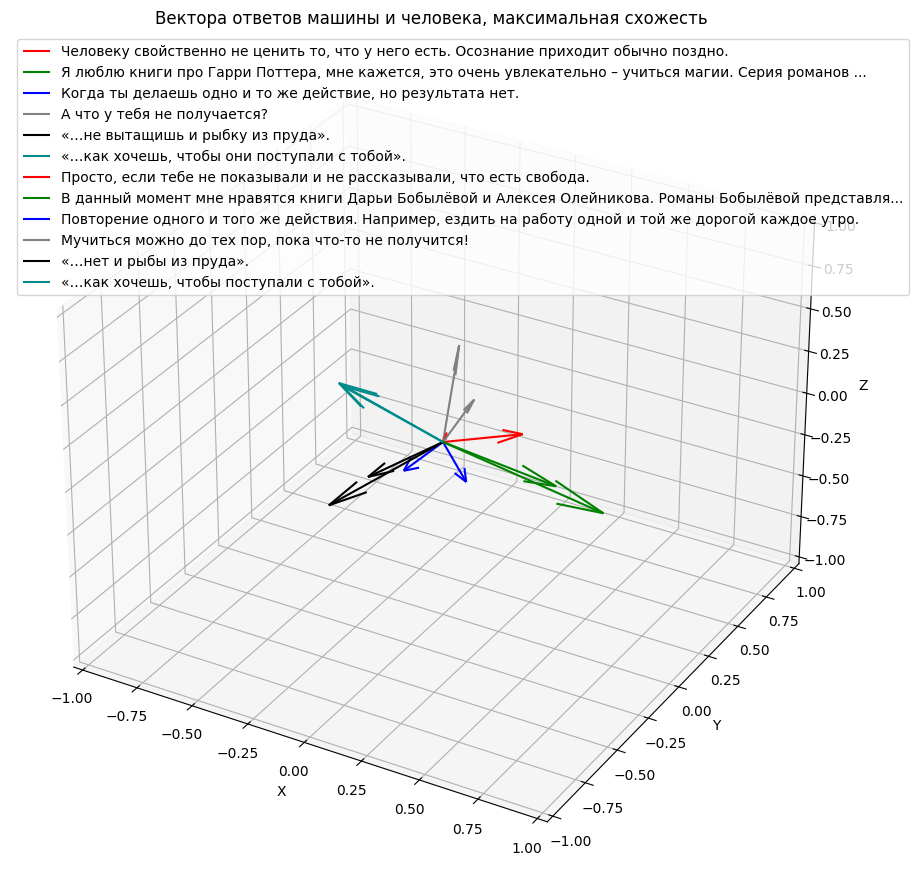

In [ ]:
#График для Алисы и превого мужчины респондента
plot_proj("Джой_Мужчина_1", "Джой", "Мужчина_1", 100, 6, True, "Вектора ответов машины и человека, максимальная схожесть", embeddings['Джой'], embeddings['Мужчина_1'], "sample_data/test.png")

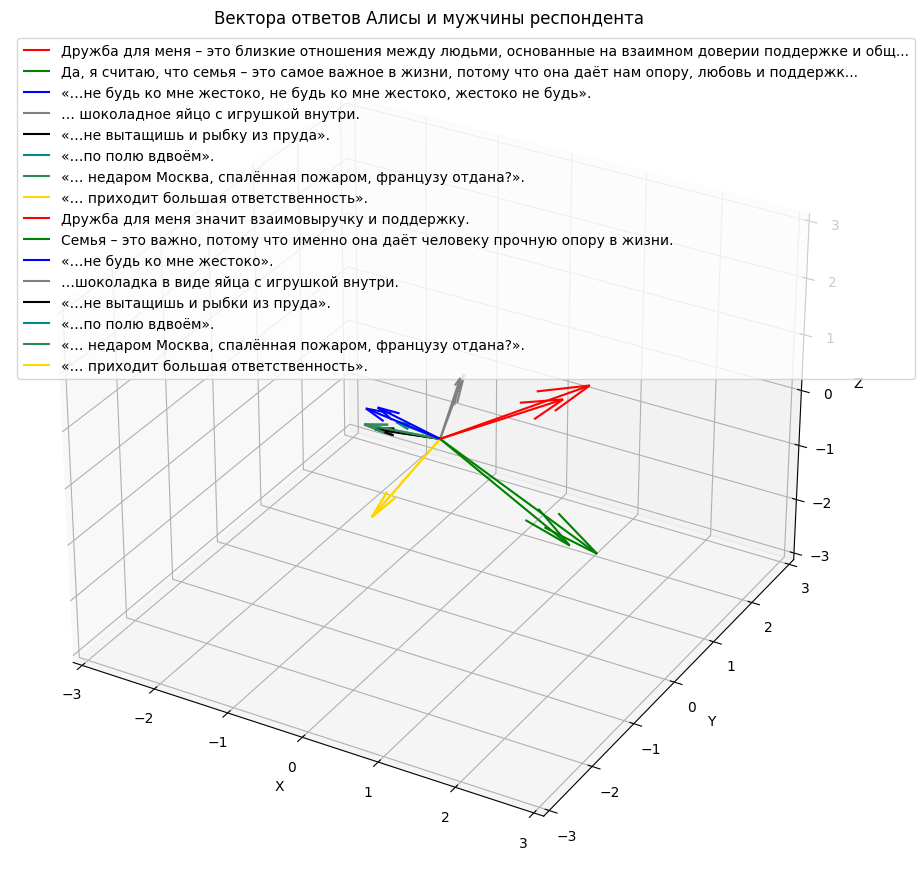

In [ ]:
#График для Алисы и второго мужчины респондента
plot_proj("Alice_men_1", "Алиса", "men_1", 100, 8, True, "Вектора ответов Алисы и мужчины респондента", Alice_sentences, Man_1)

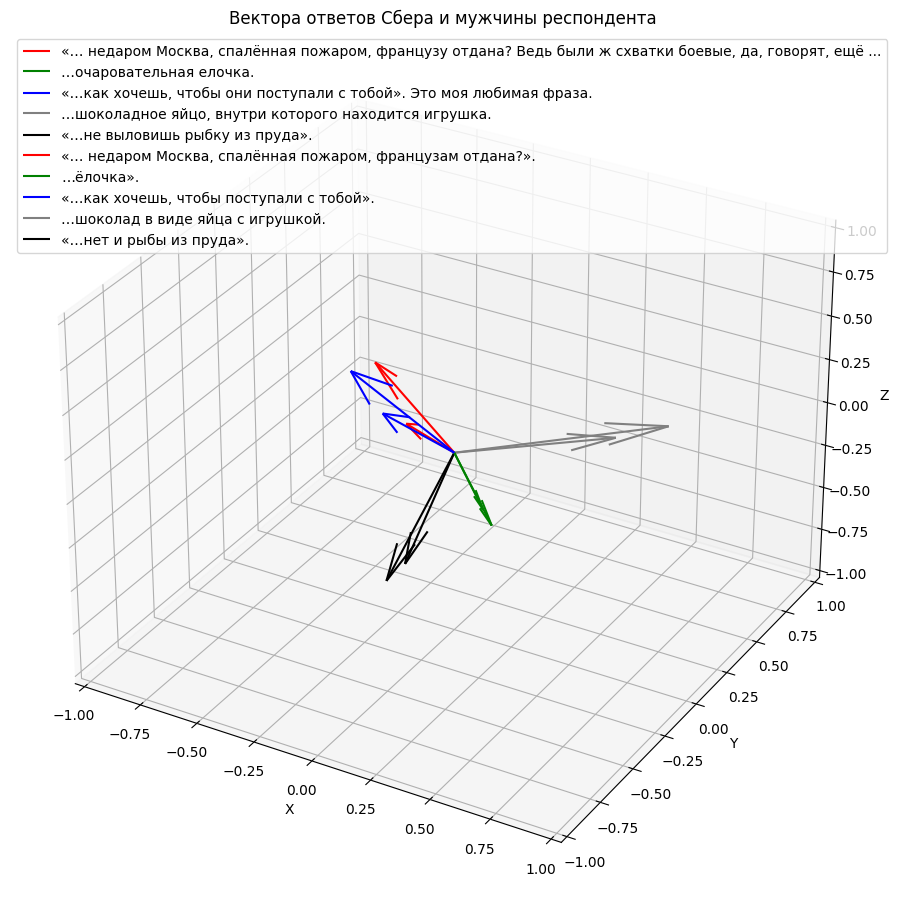

In [ ]:
#График для Сбера и первого мужчины респондента
plot_proj("Sber_men_0", "Сбер", "men_0", 100, 5, True, "Вектора ответов Сбера и мужчины респондента", Sber_sentences, Man_0)

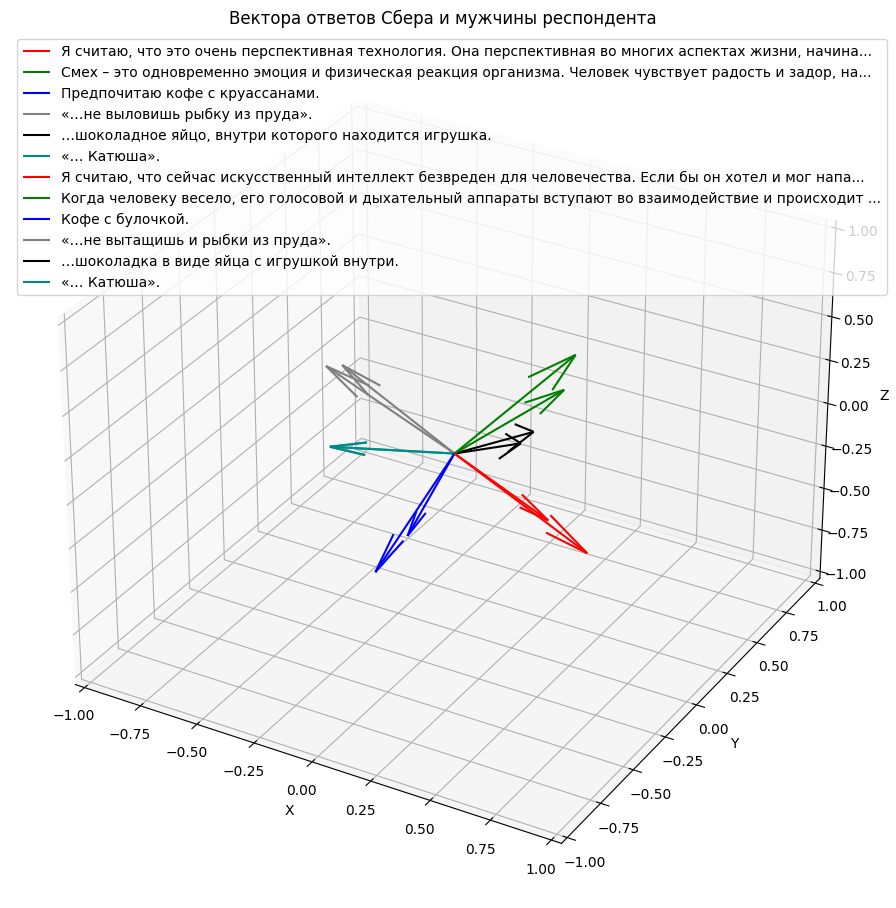

In [ ]:
#График для Сбера и второго мужчины респондента
plot_proj("Sber_men_1", "Сбер", "men_1", 100, 6, True, "Вектора ответов Сбера и мужчины респондента", Sber_sentences, Man_1)

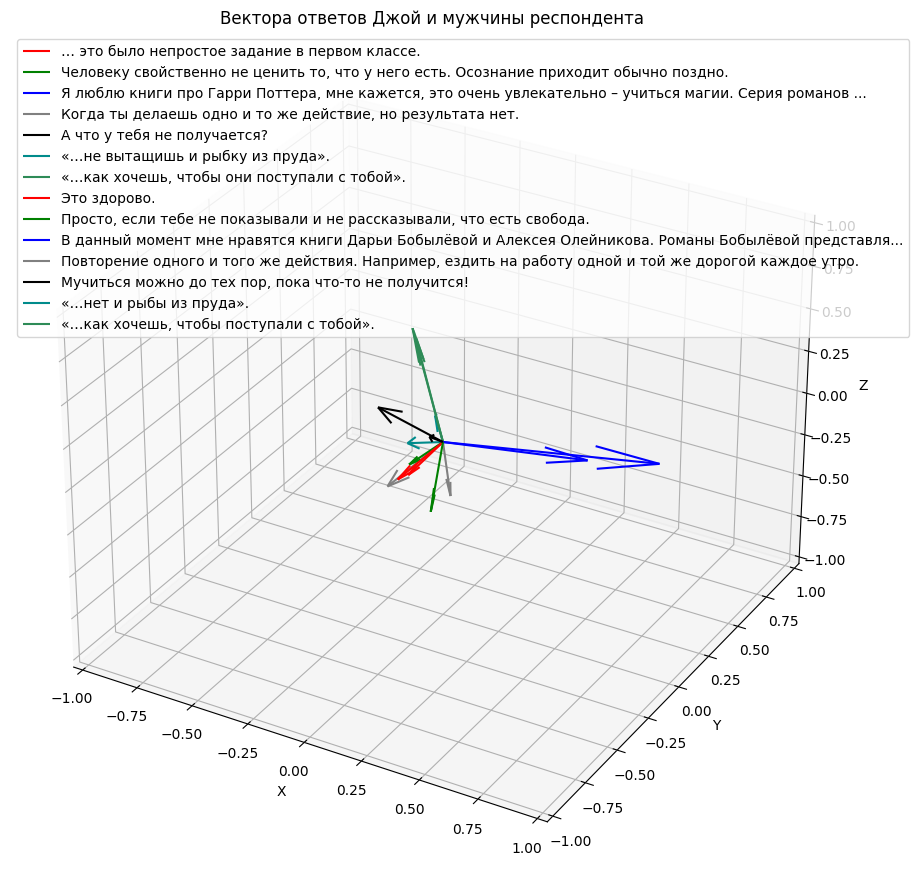

In [ ]:
#График для Джой и первого мужчины респондента
plot_proj("Joy_men_0", "Джой", "men_0", 100, 7, True, "Вектора ответов Джой и мужчины респондента", Joy_sentences, Man_0)

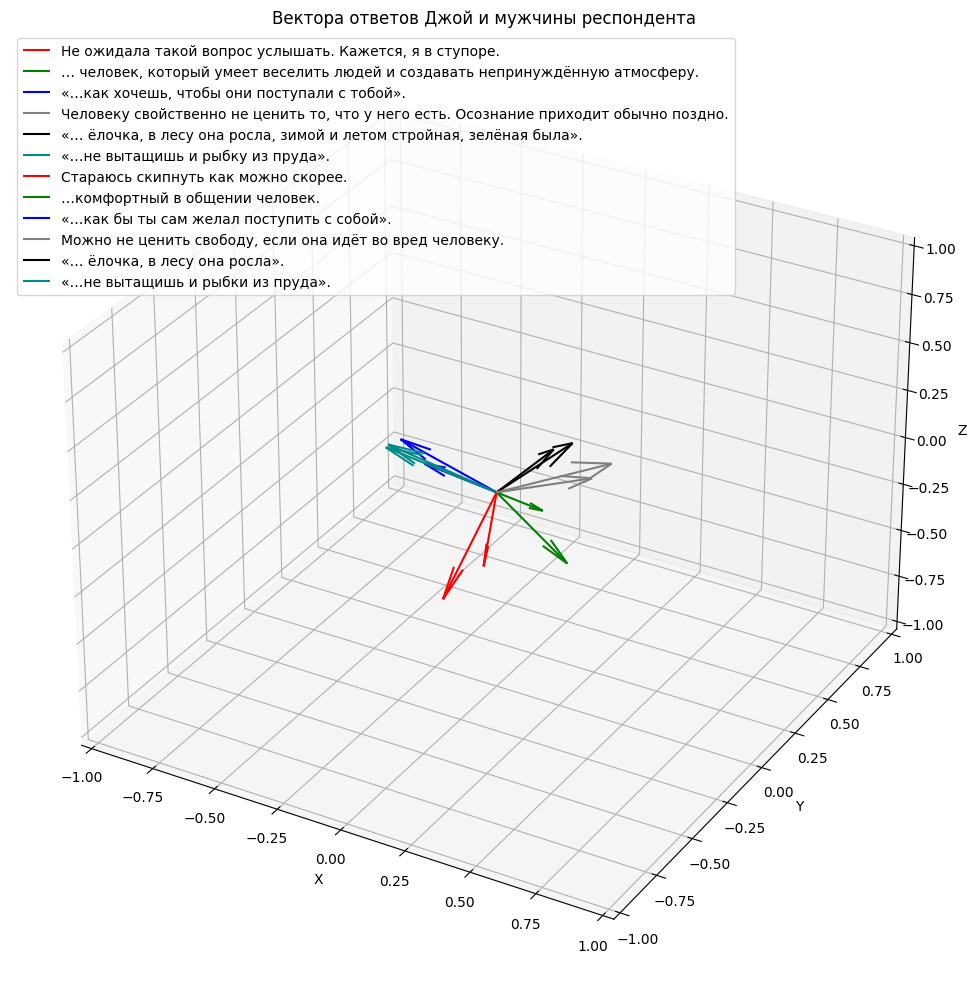

In [ ]:
#График для Джой и второго мужчины респондента
plot_proj("Joy_men_1", "Джой", "men_1", 100, 6, True, "Вектора ответов Джой и мужчины респондента", Joy_sentences, Man_1)

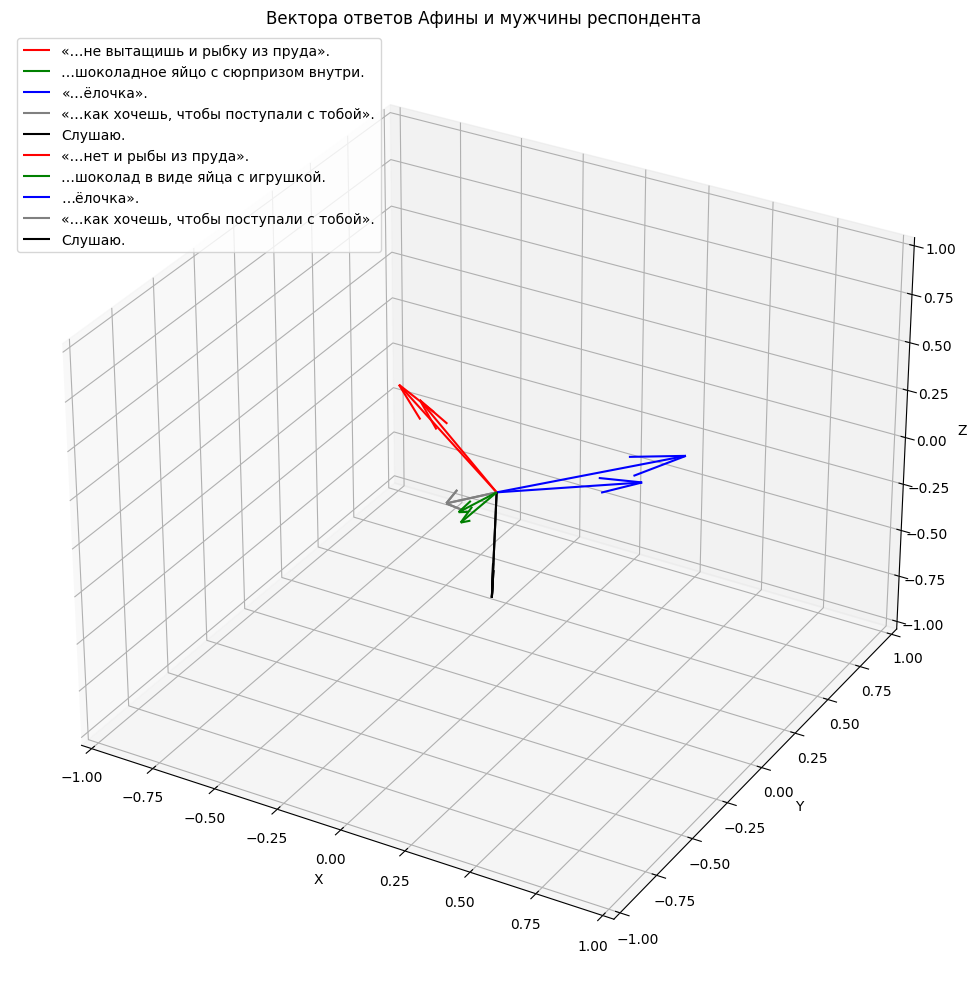

In [ ]:
#График для Афины и первого мужчины респондента
plot_proj("Afine_men_0", "Афина", "men_0", 100, 5, True, "Вектора ответов Афины и мужчины респондента", Afine_sentences, Man_0)

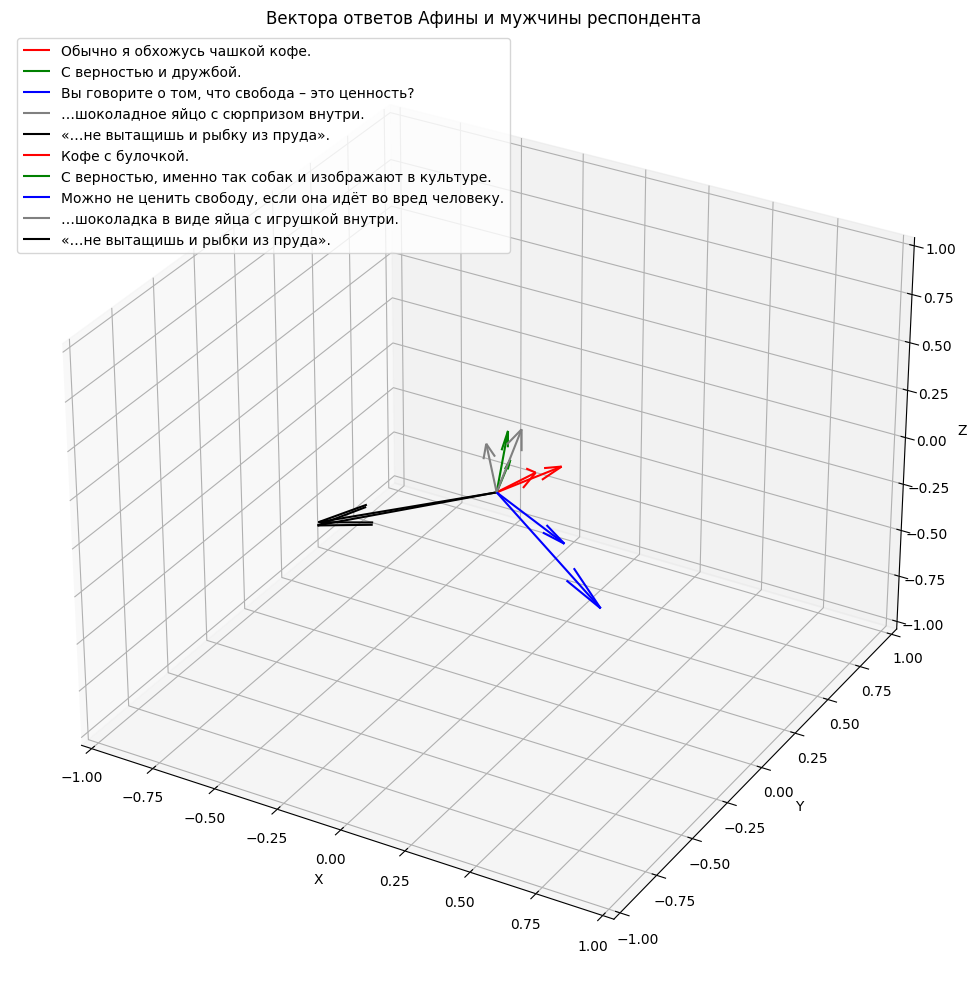

In [ ]:
#График для Афины и второго мужчины респондента
plot_proj("Afine_men_1", "Афина", "men_1", 100, 5, True, "Вектора ответов Афины и мужчины респондента", Afine_sentences, Man_1)

Выделим по n минимально схожих ответов среди каждого голосового ассистента и мужчины.

In [ ]:
sorted_data_alice_0 = data.sort_values('Alice_men_0', ascending=False)[['Question', 'Алиса', 'men_0', 'Alice_men_0']]
sorted_data_alice_0 = sorted_data_alice_0.loc[(sorted_data_alice_0['Alice_men_0'] < 0.4)]
sorted_data_alice_0.to_excel("Алиса_мужчина1_мин.xlsx")
sorted_data_alice_0

Question  \
0                                  Вы верите в судьбу?   
34          Что бы вам хотелось изменить в нашем мире?   
133  Когда вам дают групповое задание (на работе ил...   
106  Какое время года вам больше нравится? С чем эт...   
37                            Для учения нет старости?   
..                                                 ...   
36                        Как вы боретесь со стрессом?   
19       На что ни в коем случае нельзя тратить время?   
139  Как вы думаете, почему одним фортит всю жизнь,...   
101                       Что значит для вас старость?   
107                 Продолжите: «Буквы разные писать…»   

                                                 Алиса  \
0    Я верю в удачу и в то, что, если стараться, мо...   
34   Мне хотелось бы, чтобы люди были добрее друг к...   
133  Думаю, мне было бы несложно работать в команде...   
106  Мне нравится осень: она красивая, яркая и пере...   
37   Это верно для всех, не только для учеников и с...   
..                                                 ...   
36   Я стараюсь быть позитивной и благодарной за то...   
19   На бессмысленные разговоры и ожидания, а ещё ж...   
139  Думаю, удача – это такое абстрактное понятие, ...   
101  Старость – это жизненный этап, когда человек с...   
107  «… тонким пёрышком в тетрадь учат в школе, уча...   

                                                 men_0  Alice_men_0  
0    Не могу сказать, что не верю или верю полность...     0.397925  
34   Чтобы люди чаще понимали друг друга, во всех с...     0.397039  
133  Будто трудно, но это по началу, со временем пр...     0.394169  
106                         Лето. Много света и тепла.     0.392801  
37                            Да, мы учимся всю жизнь.     0.391380  
..                                                 ...          ...  
36                              Самоанализ, видеоигры.    -0.008459  
19   На декоративный контент, который каждый выбира...    -0.011206  
139                                      Такова жизнь.    -0.015526  
101  Не радость. Пошутил бы я, но это путь к умирот...    -0.026933  
107                                       Это здорово.    -0.085306  

[121 rows x 4 columns]

In [ ]:
sorted_data_alice_1 = data.sort_values('Alice_men_1', ascending=False)[['Question', 'Алиса', 'men_1', 'Alice_men_1']]
sorted_data_alice_1 = sorted_data_alice_1.loc[(sorted_data_alice_1['Alice_men_1'] < 0.4)]
sorted_data_alice_1.to_excel("Алиса_мужчина2_мин.xlsx")
sorted_data_alice_1

Question  \
105                 Что было раньше – курица или яйцо?   
122             Дайте определение: золотые руки – это…   
42            Кто не хочет жить в мире без конфликтов?   
43                 Кто в семье главный: мама или папа?   
58            Вам нравится выступать перед аудиторией?   
..                                                 ...   
139  Как вы думаете, почему одним фортит всю жизнь,...   
132  Вам больше нравятся электронные или бумажные з...   
49       Кто получает много вопросов, но не задаёт их?   
68   Задаете ли вы вопросы слушателям, чтобы понять...   
146  Опишите ситуацию, которую можно охарактеризова...   

                                                 Алиса  \
105  Мне кажется, что и курица, и яйцо появились од...   
122  … образное выражение, которое означает, что у ...   
42   Думаю, каждый хотел бы жить в мире, где нет ме...   
43                        В каждой семье свои порядки.   
58   Да, мне нравится общаться с людьми – это моё х...   
..                                                 ...   
139  Думаю, удача – это такое абстрактное понятие, ...   
132  Мне нравится, когда всё аккуратно и вовремя. Г...   
49   Мне кажется, это человек, который предпочитает...   
68   Я не могу задавать вопросы, но всегда рада пог...   
146  Ситуация «25/8» характеризуется чрезмерной зан...   

                                                 men_1  Alice_men_1  
105  Как говорил мой дед, не знаю, но курицу явно к...     0.383466  
122                                      …умелые руки.     0.376287  
42       Тот, для кого конфликты – важная часть жизни.     0.369160  
43   В семье главное взаимопонимание между мамой и ...     0.362707  
58                Нет, это заставляет меня нервничать.     0.355914  
..                                                 ...          ...  
139                                 Так карта ложится.    -0.031316  
132             Электронные, бумажные нам не выдавали.    -0.032598  
49                                            Господь.    -0.034567  
68                                По возможности «да».    -0.082448  
146                            Урок по дробям в школе.    -0.094987  

[102 rows x 4 columns]

In [ ]:
sorted_data_sber_0 = data.sort_values('Sber_men_0', ascending=False)[['Question', 'Сбер', 'men_0', 'Sber_men_0']]
sorted_data_sber_0 = sorted_data_sber_0.loc[(sorted_data_sber_0['Sber_men_0'] < 0.4)]
sorted_data_sber_0.to_excel("Сбер_мужчина1_мин.xlsx")
sorted_data_sber_0

Question  \
0                                  Вы верите в судьбу?   
18                 Вы часто разочаровываетесь в людях?   
49       Кто получает много вопросов, но не задаёт их?   
121       Дайте определение: механизмы мышления – это…   
37                            Для учения нет старости?   
..                                                 ...   
61   Вы строги по отношению к другим или по отношен...   
64                              Где и как спят облака?   
69   Вы всегда можете найти тему для разговора даже...   
95            С чем у вас ассоциируется дуэль? Почему?   
98   С чем у вас ассоциируется искусственный интелл...   

                                                  Сбер  \
0    Всё зависит от человека: если человек хочет че...   
18                                 Я всегда переживаю.   
49                                    Справочное бюро.   
121  …познавательная деятельность человека, которая...   
37   Нет ограничений по возрасту для того, чтобы уч...   
..                                                 ...   
61                             Так, вы это серьёзно?     
64   Облака – это пушистые мягкие игрушки, которые ...   
69                Мне нравится узнавать новое о людях.   
95   Дуэли обычно происходят внутри определённых об...   
98   Искусственный интеллект ассоциируется у меня с...   

                                                 men_0  Sber_men_0  
0    Не могу сказать, что не верю или верю полность...    0.392848  
18   Крайне редко. Это настоящее событие для меня е...    0.386424  
49                                Голосовой ассистент.    0.379084  
121       …процессы, с помощью которых человек думает.    0.377028  
37                            Да, мы учимся всю жизнь.    0.372559  
..                                                 ...         ...  
61   Я стараюсь быть понимающим и не судить людей с...   -0.042488  
64                                  В воде или океане.   -0.049556  
69                           Не уверен, но будто «да».   -0.053492  
95          Игра со смертью во имя чести, либо прихоти   -0.057267  
98   Возможности, упрощение. Он быстр и его приспос...   -0.072673  

[133 rows x 4 columns]

In [ ]:
sorted_data_sber_1 = data.sort_values('Sber_men_1', ascending=False)[['Question', 'Сбер', 'men_1', 'Sber_men_1']]
sorted_data_sber_1 = sorted_data_sber_1.loc[(sorted_data_sber_1['Sber_men_1'] < 0.4)]
sorted_data_sber_1.to_excel("Сбер_мужчина2_мин.xlsx")
sorted_data_sber_1

Question  \
129             Дайте определение: белая ворона – это…   
53       Какой праздник для вас дорог и важен? Почему?   
146  Опишите ситуацию, которую можно охарактеризова...   
98   С чем у вас ассоциируется искусственный интелл...   
87                   Что значит для вас толерантность?   
59     Стремитесь ли вы сотрудничать с другими людьми?   
84                  Верите ли вы в жизнь после смерти?   
115                  Продолжите: «Ням, ням, ням, ням…»   

                                                  Сбер  \
129  …выражение происходит от редкости белых ворон ...   
53   День Эльфа. В этот день родился Джон Толкин, а...   
146  Это пропускная способность канала связи? «25/8...   
98   Искусственный интеллект ассоциируется у меня с...   
87   Толерантность – это не равнодушие и не приняти...   
59   Это всё писатели придумали. Например, в романе...   
84   Большинство религий обещает верующим, что душа...   
115                       …будет ещё больше вкусняшек.   

                                                 men_1  Sber_men_1  
129                      …не вписывающийся в общество.    0.376058  
53   Дни рождения и новый год. Это традиции, которы...    0.363611  
146                            Урок по дробям в школе.    0.357540  
98                               С фильмами о будущем.    0.332547  
87                                   Умение принимать.    0.321062  
59   Однозначно, я стремлюсь к сотрудничеству, пото...    0.316046  
84                                Не верю, но надеюсь.    0.250846  
115                          …ням, ням, ням, ням, ммм.    0.184645

In [ ]:
sorted_data_joy_0 = data.sort_values('Joy_men_0', ascending=False)[['Question', 'Джой', 'men_0', 'Joy_men_0']]
sorted_data_joy_0 = sorted_data_joy_0.loc[(sorted_data_joy_0['Joy_men_0'] < 0.4)]
sorted_data_joy_0.to_excel("Джой_мужчина1_мин.xlsx")
sorted_data_joy_0

Question  \
5    Что общего между мужчиной и жениной? Чем отлич...   
28          Вы верите в силу мысли и законы Вселенной?   
63                                 Как возникает смех?   
114                            Продолжите: «Не кисни…»   
128           Дайте определение: чучело-мяучело – это…   
122             Дайте определение: золотые руки – это…   
13       Как выглядит ваша идеальная вторая половинка?   
120             Дайте определение: акула из ИКЕА– это…   
104  Почему волонтёрство это хорошо? Бывают ли случ...   
81                           Что значит для вас тоска?   
41    Кто не хочет найти своё истинное предназначение?   
139  Как вы думаете, почему одним фортит всю жизнь,...   

                                                  Джой  \
5    Они могут влюбляться, а ещё у них есть чувства...   
28   Конечно, я верю в силу мысли, но больше в зако...   
63   Смех возникает как реакция на юмор или щекотку...   
114                          Я тебя прошу – не грусти!   
128  …название советского музыкального мультипликац...   
122  «Золотые руки» могут иметь несколько значений:...   
13   Я бы хотела, чтобы она была похожа на меня, мы...   
120  …синяя акула, известная как Блохэй. Является п...   
104             Я уважаю всех, кто работает с заботой.   
81   Она может проявляться в различных формах, таки...   
41   Люди, которые не хотят найти своё истинное пре...   
139   Что ты имеешь в виду? Термин фортить использу...   

                                                 men_0  Joy_men_0  
5                    Они в первую очередь люди. Собой.   0.393714  
28   В физические законы вселенной – да, в силу мыс...   0.392923  
63                                           Искренне.   0.392615  
114                                   «…иди, повисни».   0.374656  
128                                    …мёртвая кошка.   0.357529  
122                                …способный человек.   0.351351  
13   Я не могу ответить чётко на этот вопрос, потом...   0.347966  
120  …мягкая игрушка, которая популярна у молодых л...   0.331420  
104  Волонтёрство, по моему мнению, это индивидуаль...   0.296289  
81                     Чувство потери чего-то важного.   0.264683  
41                                 Тот, кто нашёл его.   0.205241  
139                                      Такова жизнь.   0.188852

In [ ]:
sorted_data_joy_0 = data.sort_values('Joy_men_0', ascending=False)[['Question', 'Джой', 'men_0', 'Joy_men_0']]
sorted_data_joy_0 = sorted_data_joy_0.loc[(sorted_data_joy_0['Joy_men_0'] < 0.4)]
sorted_data_joy_0.to_excel("Джой_мужчина1_мин.xlsx")
sorted_data_joy_0

Question  \
5    Что общего между мужчиной и жениной? Чем отлич...   
28          Вы верите в силу мысли и законы Вселенной?   
63                                 Как возникает смех?   
114                            Продолжите: «Не кисни…»   
128           Дайте определение: чучело-мяучело – это…   
122             Дайте определение: золотые руки – это…   
13       Как выглядит ваша идеальная вторая половинка?   
120             Дайте определение: акула из ИКЕА– это…   
104  Почему волонтёрство это хорошо? Бывают ли случ...   
81                           Что значит для вас тоска?   
41    Кто не хочет найти своё истинное предназначение?   
139  Как вы думаете, почему одним фортит всю жизнь,...   

                                                  Джой  \
5    Они могут влюбляться, а ещё у них есть чувства...   
28   Конечно, я верю в силу мысли, но больше в зако...   
63   Смех возникает как реакция на юмор или щекотку...   
114                          Я тебя прошу – не грусти!   
128  …название советского музыкального мультипликац...   
122  «Золотые руки» могут иметь несколько значений:...   
13   Я бы хотела, чтобы она была похожа на меня, мы...   
120  …синяя акула, известная как Блохэй. Является п...   
104             Я уважаю всех, кто работает с заботой.   
81   Она может проявляться в различных формах, таки...   
41   Люди, которые не хотят найти своё истинное пре...   
139   Что ты имеешь в виду? Термин фортить использу...   

                                                 men_0  Joy_men_0  
5                    Они в первую очередь люди. Собой.   0.393714  
28   В физические законы вселенной – да, в силу мыс...   0.392923  
63                                           Искренне.   0.392615  
114                                   «…иди, повисни».   0.374656  
128                                    …мёртвая кошка.   0.357529  
122                                …способный человек.   0.351351  
13   Я не могу ответить чётко на этот вопрос, потом...   0.347966  
120  …мягкая игрушка, которая популярна у молодых л...   0.331420  
104  Волонтёрство, по моему мнению, это индивидуаль...   0.296289  
81                     Чувство потери чего-то важного.   0.264683  
41                                 Тот, кто нашёл его.   0.205241  
139                                      Такова жизнь.   0.188852

In [ ]:
sorted_data_afine_0 = data.sort_values('Afine_men_0', ascending=False)[['Question', 'Афина', 'men_0', 'Afine_men_0']]
sorted_data_afine_0 = sorted_data_afine_0.loc[(sorted_data_afine_0['Afine_men_0'] < 0.4)]
sorted_data_afine_0.to_excel("Афина_мужчина1_мин.xlsx")
sorted_data_afine_0

Question  \
31      Кем быть лучше – интровертом или экстравертом?   
135  Почему, по вашему мнению, люди часто выбирают ...   
114                            Продолжите: «Не кисни…»   
109                   Продолжите: «Мы пойдём с конём…»   
5    Что общего между мужчиной и жениной? Чем отлич...   
145  Опишите ситуацию, которую можно охарактеризова...   
115                  Продолжите: «Ням, ням, ням, ням…»   
91         С чем у вас ассоциируется снежинка? Почему?   
12                  Какие вредные привычки у вас есть?   
13       Как выглядит ваша идеальная вторая половинка?   
124           Дайте определение: спор поколений – это…   

                                                 Афина  \
31   Вопрос о том, кем быть лучше, является сложным...   
135  Фриланс предоставляет людям возможность работа...   
114                                    …с самого утра.   
109                 …на рыбалку или на речку купаться.   
5    Общим для мужчин и женщин является склонность ...   
145  Эту историю любил рассказывать физик Сергей Пе...   
115                          …вы едите что-то вкусное?   
91   С красотой и уникальностью. Это символ чистоты...   
12                                      У меня их нет.   
13                               Как Александр Пушкин.   
124  …межпоколенческие конфликты, разрыв между поко...   

                                                 men_0  Afine_men_0  
31   Интровертом, так как эти люди больше в себе, в...     0.390326  
135  Мне кажется, это удобнее, чем сидеть с утра до...     0.387342  
114                                   «…иди, повисни».     0.368985  
109                                 «…по полю вдвоём».     0.340684  
5                    Они в первую очередь люди. Собой.     0.333972  
145                   Ахиллесу попали стрелой в пятку.     0.327170  
115                                            …Амням.     0.326305  
91                     С Новым годом, такова традиция.     0.320721  
12                               Курить «за компанию».     0.319475  
13   Я не могу ответить чётко на этот вопрос, потом...     0.277394  
124                                      вечная тема.      0.203768

In [ ]:
sorted_data_afine_1 = data.sort_values('Afine_men_1', ascending=False)[['Question', 'Афина', 'men_1', 'Afine_men_1']]
sorted_data_afine_1 = sorted_data_afine_1.loc[(sorted_data_afine_1['Afine_men_1'] < 0.4)]
sorted_data_afine_1.to_excel("Афина_мужчина2_мин.xlsx")
sorted_data_afine_1

Question  \
91         С чем у вас ассоциируется снежинка? Почему?   
53       Какой праздник для вас дорог и важен? Почему?   
138  На выходных вы любите залипать в фильмы или в ...   
109                   Продолжите: «Мы пойдём с конём…»   
98   С чем у вас ассоциируется искусственный интелл...   
31      Кем быть лучше – интровертом или экстравертом?   
114                            Продолжите: «Не кисни…»   
115                  Продолжите: «Ням, ням, ням, ням…»   

                                                 Афина  \
91   С красотой и уникальностью. Это символ чистоты...   
53     День знаний. Это мой профессиональный праздник.   
138  Все мои познания в плотских удовольствиях огра...   
109                 …на рыбалку или на речку купаться.   
98   Искусственный интеллект ассоциируется с технол...   
31   Вопрос о том, кем быть лучше, является сложным...   
114                                    …с самого утра.   
115                          …вы едите что-то вкусное?   

                                                 men_1  Afine_men_1  
91   С зимой, потому что именно в это время года ид...     0.374818  
53   Дни рождения и новый год. Это традиции, которы...     0.369122  
138                            Да, но не на весь день.     0.344857  
109                                 «…по полю вдвоём».     0.340684  
98                               С фильмами о будущем.     0.311122  
31                          Я думаю, лучше быть собой.     0.310705  
114                                       «…,клюшка!».     0.292505  
115                          …ням, ням, ням, ням, ммм.     0.117332

Аналогичным образом построим графики для векторов ответов.

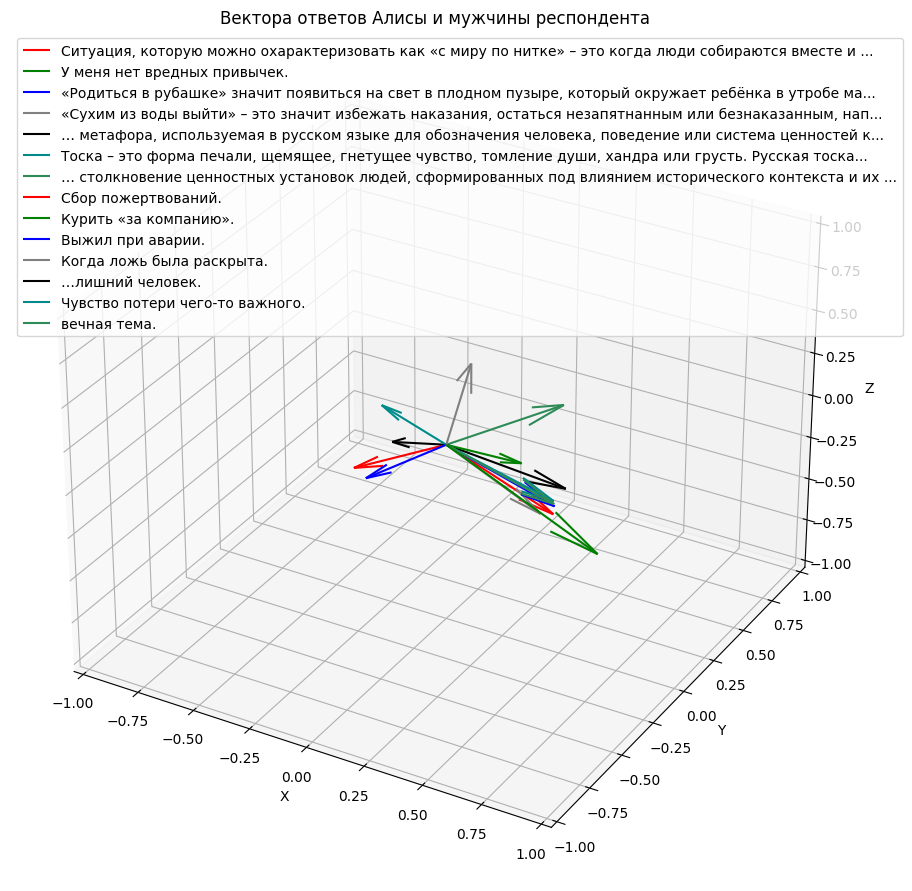

In [ ]:
plot_proj("Alice_men_0", "Алиса", "men_0", 100, 7, False, "Вектора ответов Алисы и мужчины респондента", Alice_sentences, Man_0)

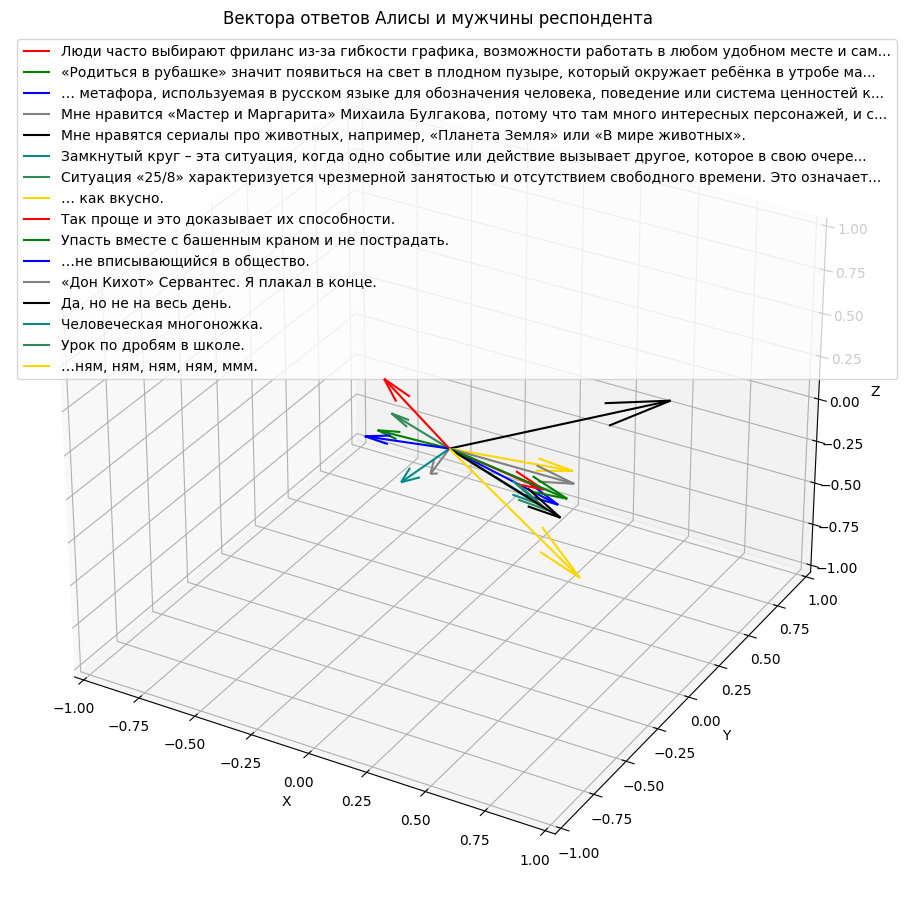

In [ ]:
plot_proj("Alice_men_1", "Алиса", "men_1", 100, 8, False, "Вектора ответов Алисы и мужчины респондента", Alice_sentences, Man_1)

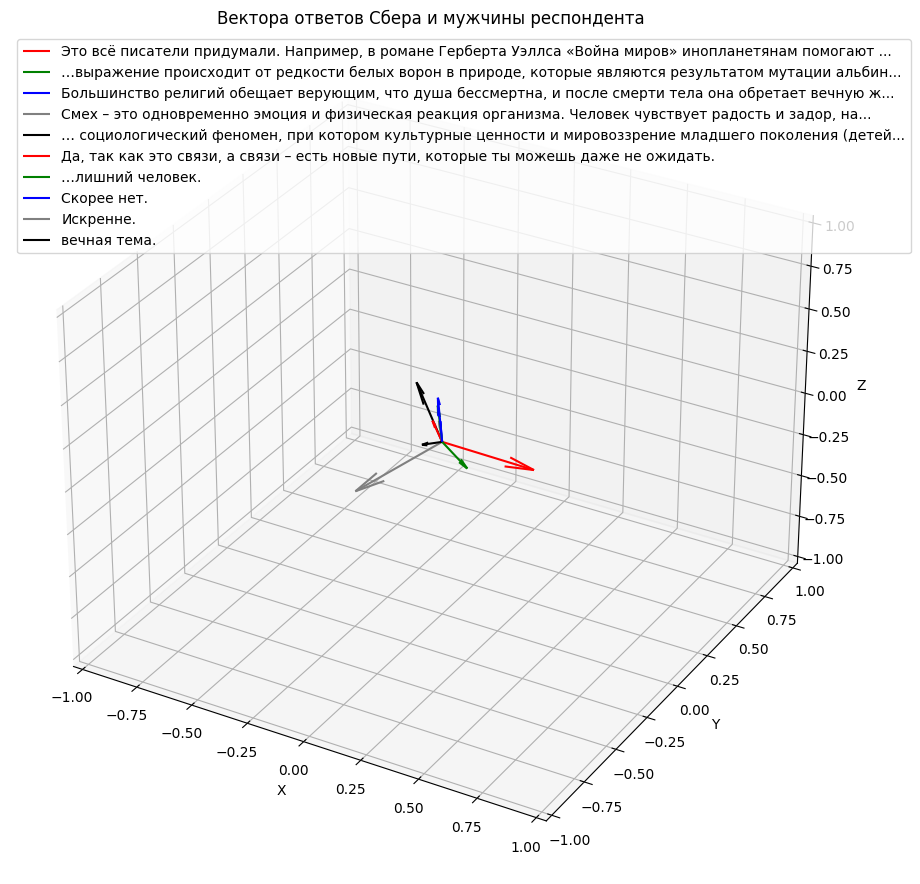

In [ ]:
plot_proj("Sber_men_0", "Сбер", "men_0", 100, 5, False, "Вектора ответов Сбера и мужчины респондента", Sber_sentences, Man_0)

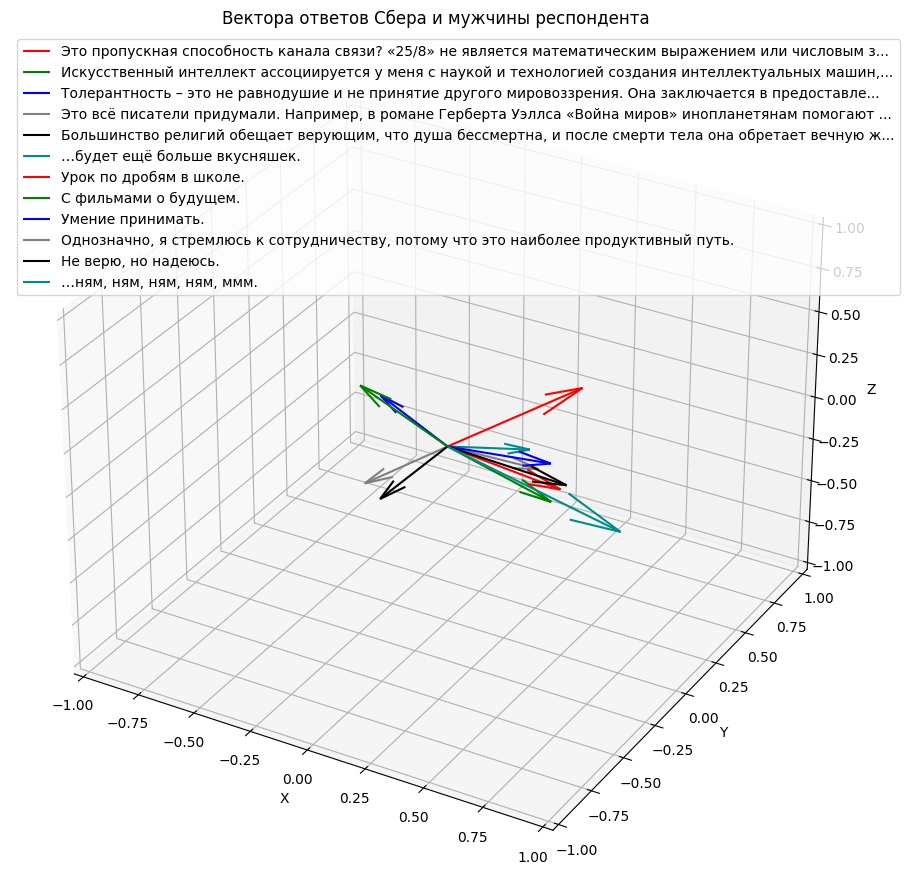

In [ ]:
plot_proj("Sber_men_1", "Сбер", "men_1", 100, 6, False, "Вектора ответов Сбера и мужчины респондента", Sber_sentences, Man_1)

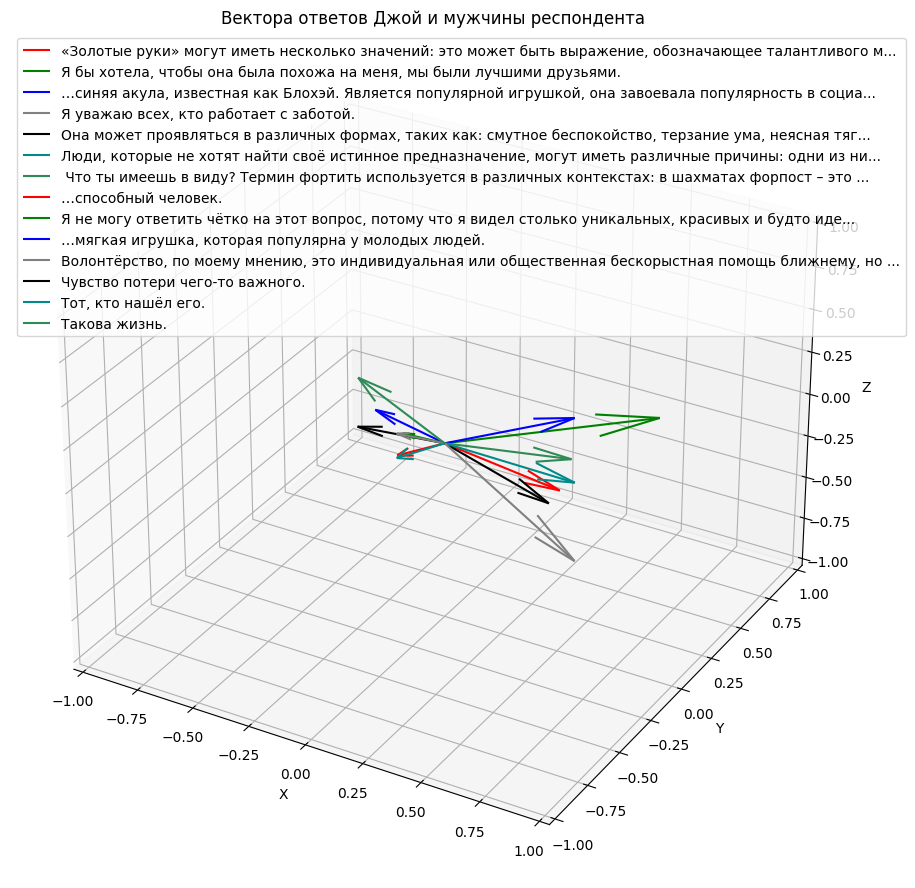

In [ ]:
plot_proj("Joy_men_0", "Джой", "men_0", 100, 7, False, "Вектора ответов Джой и мужчины респондента", Joy_sentences, Man_0)

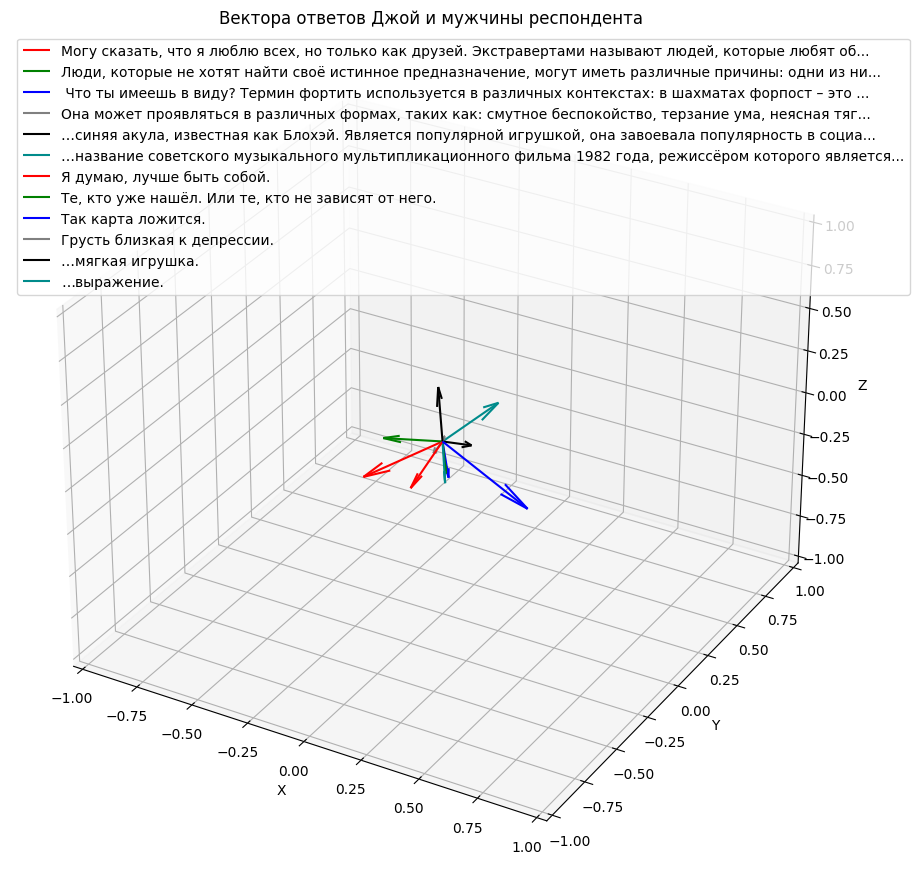

In [ ]:
plot_proj("Joy_men_1", "Джой", "men_1", 100, 6, False, "Вектора ответов Джой и мужчины респондента", Joy_sentences, Man_1)

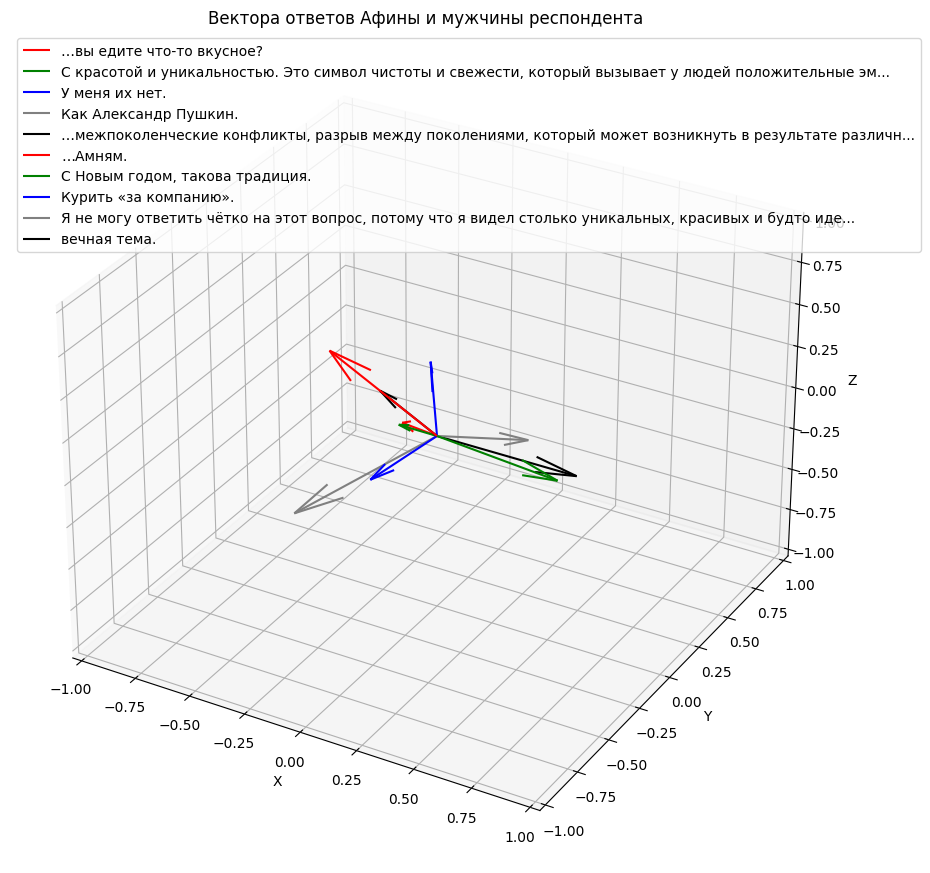

In [ ]:
plot_proj("Afine_men_0", "Афина", "men_0", 100, 5, False, "Вектора ответов Афины и мужчины респондента", Afine_sentences, Man_0)

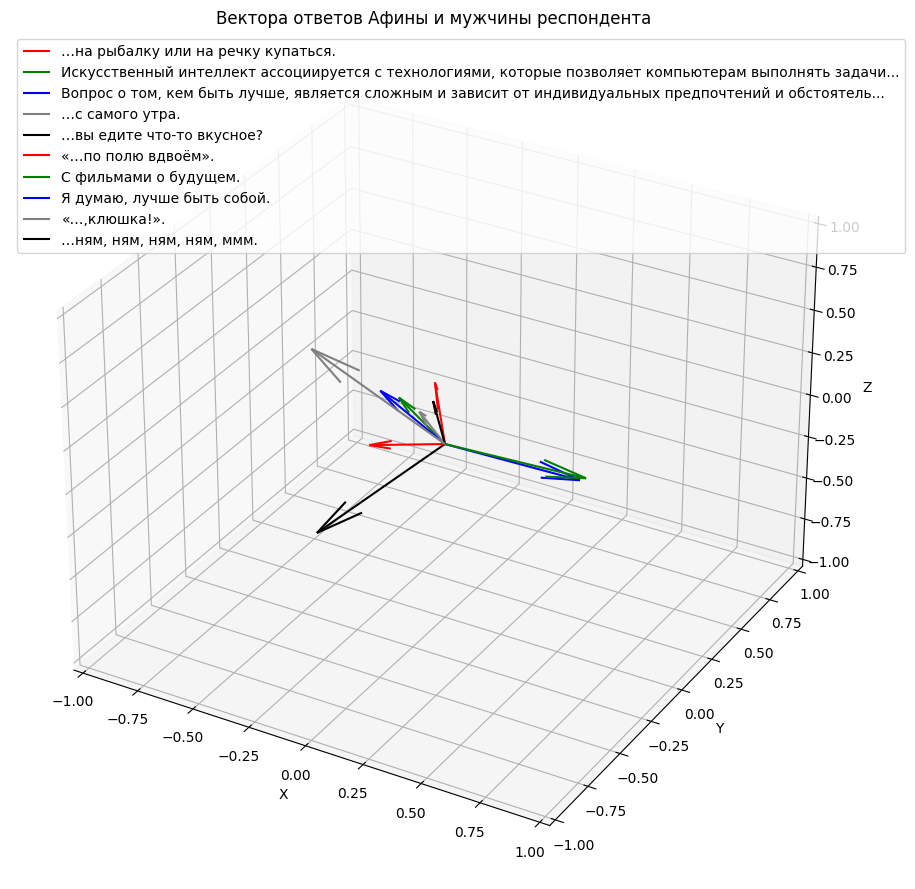

In [ ]:
plot_proj("Afine_men_1", "Афина", "men_1", 100, 5, False, "Вектора ответов Афины и мужчины респондента", Afine_sentences, Man_1)

Построим тепловую карту среднего значения косинусных расстояний между ответом голосовго ассистента и мужчины респондента.

In [ ]:
import matplotlib.ticker as mticker

In [ ]:
def plot_heatmap(average: np.ndarray, rows_names: list, columns_names: list, cmap: str, save_path:str = None) -> None:
  '''
  Функция для построения тепловой карты среднего косинусного сходства.
  in: average - средние значения косинусного сходства среди ответов
  in: row_names - имена строк(голосовых помощников)
  in: columns_names - имена колонок
  in: cmap - цветовая гамма для графика
  in: [save_path] - путь для сохранения, по умолчанию - None
  '''
  plt.figure(figsize=(4.2, 3.46), dpi=300)

  sns.heatmap(average,
              linewidth=.5,
              xticklabels=columns_names,
              yticklabels=rows_names,
              annot=True,
              cmap=cmap)

  cbar = plt.gcf().axes[-1]
  cbar.yaxis.set_major_formatter(mticker.FormatStrFormatter("%.2f"))
  cbar.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5))

  plt.title("Тепловая карта среднего косинусного сходства", fontsize=10)
  if save_path is not None:
    plt.savefig(save_path)

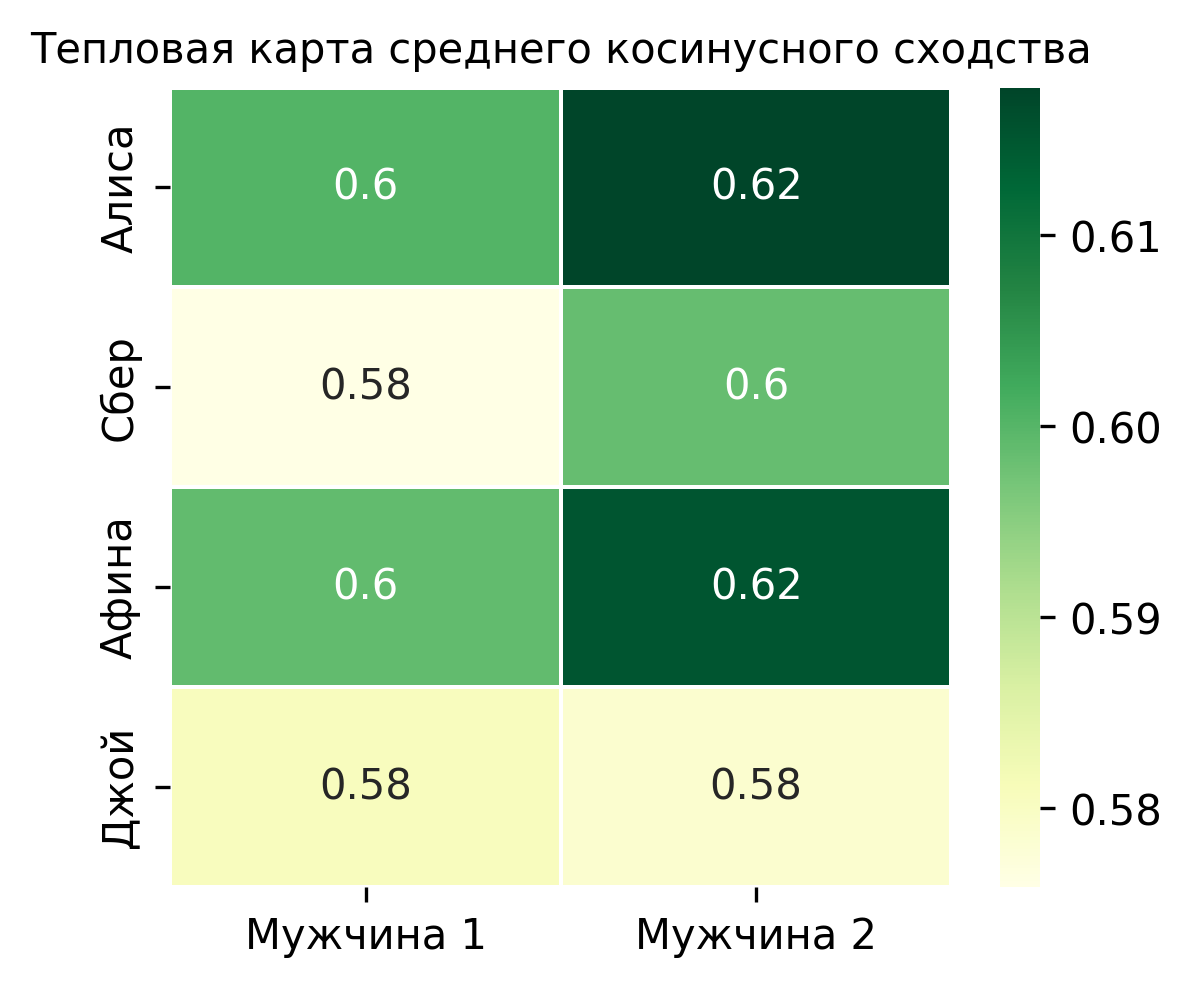

In [ ]:
cols = ["Алиса", "Сбер", "Афина", "Джой"]
pe = ["Мужчина_1", "Мужчина_2"]

average = np.array([[data[f"{y}_{x}"].mean() for x in pe] for y in cols]).reshape(4, 2)
rows = ['Алиса', 'Сбер', 'Афина', 'Джой']
columns = ['Мужчина 1', 'Мужчина 2']
path = "new_data/average_by_every_men"
cmap = "YlGn"
plot_heatmap(average, rows, columns, cmap, path)


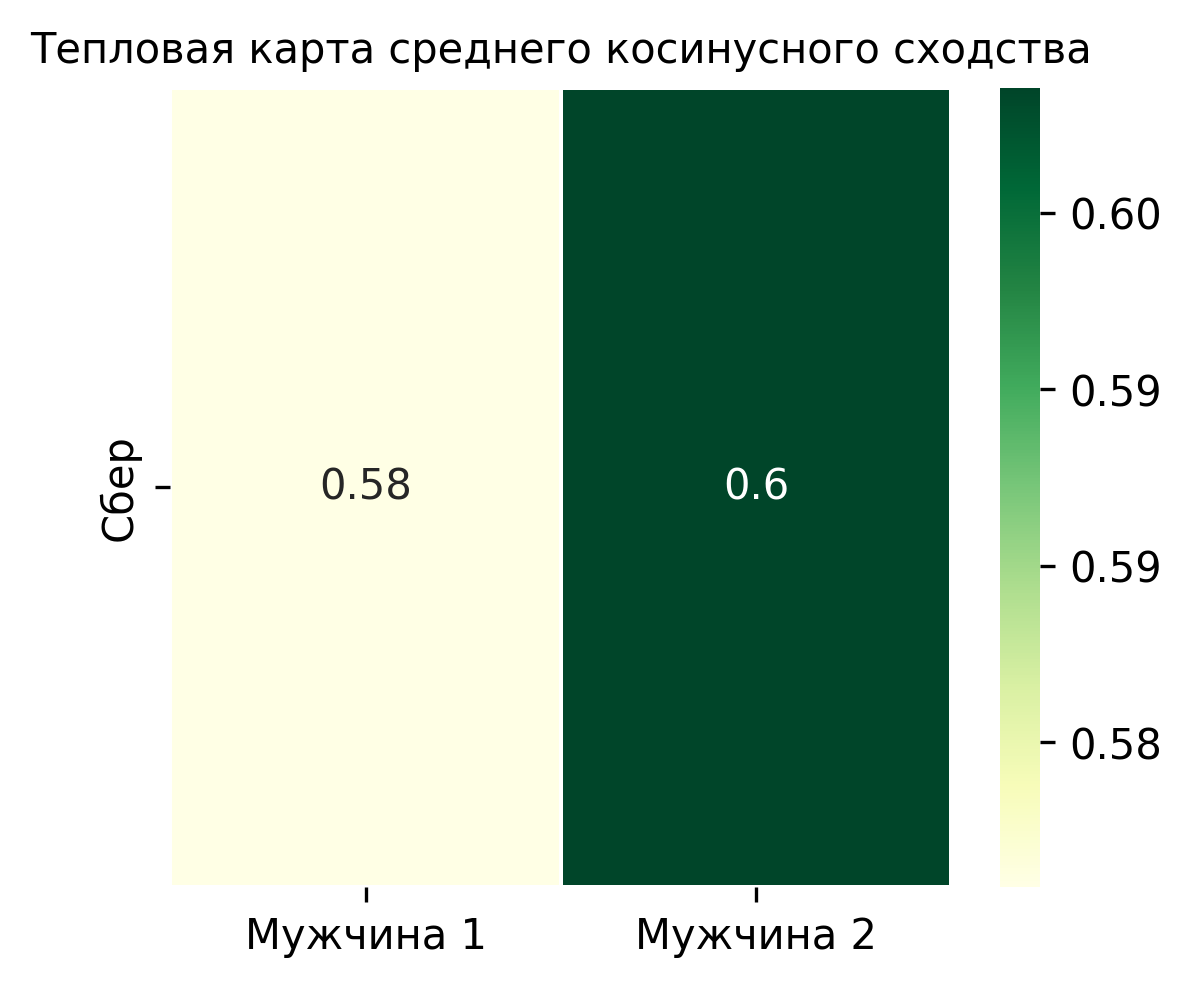

In [ ]:
rows = ['Сбер']
columns = ['Мужчина_1', 'Мужчина_2']

average = np.array([[data[f"{y}_{x}"].mean() for x in columns] for y in rows])
columns = ['Мужчина 1', 'Мужчина 2']
path = "new_data/average_by_every_men_sber"
cmap = "YlGn"
plot_heatmap(average, rows, columns, cmap, path)


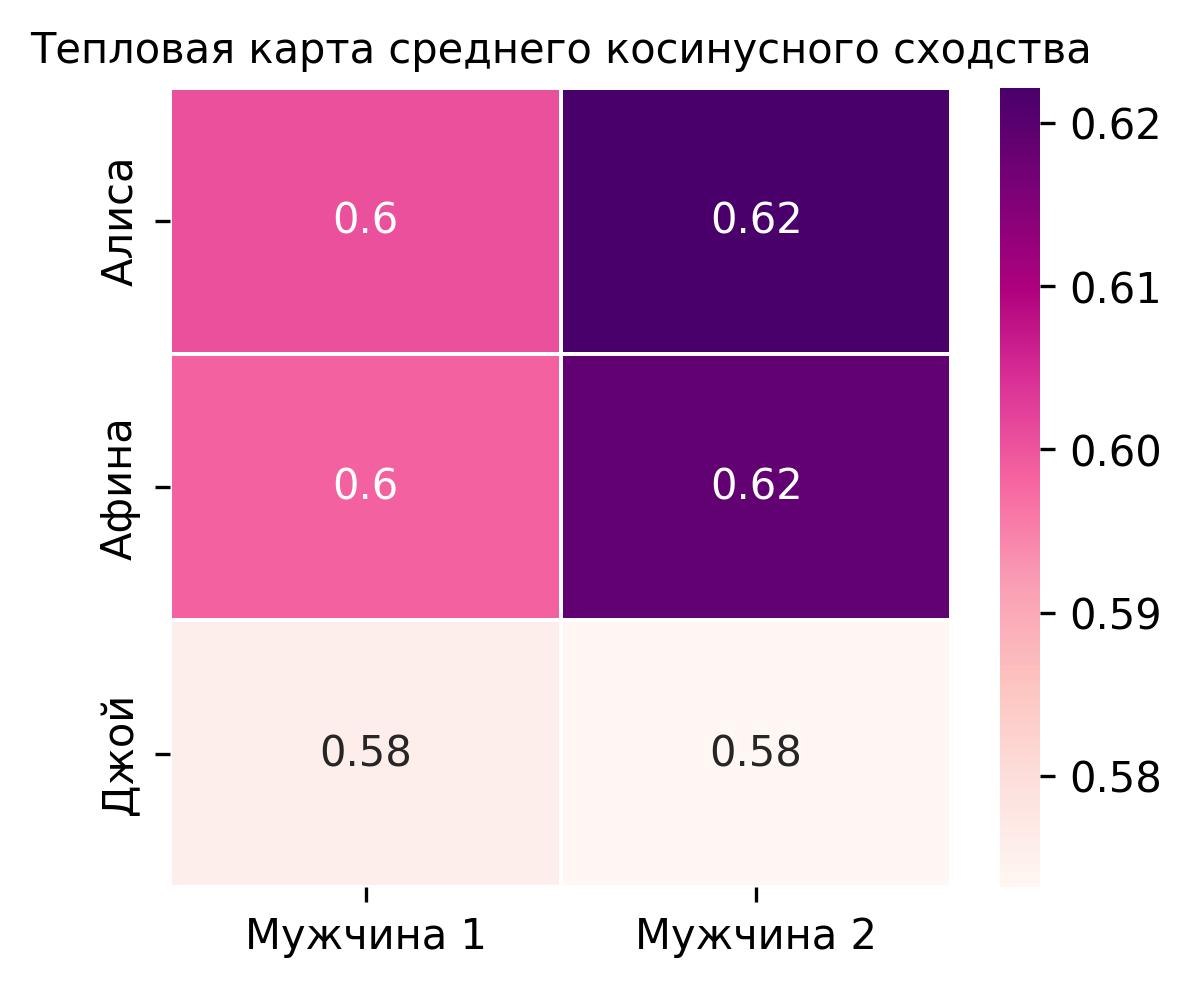

In [ ]:
rows = ['Алиса', 'Афина', 'Джой']
columns = ['Мужчина_1', 'Мужчина_2']

average = np.array([[data[f"{y}_{x}"].mean() for x in columns] for y in rows]).reshape(3, 2)
columns = ['Мужчина 1', 'Мужчина 2']
path = "new_data/average_by_every_men_girls"
cmap = "RdPu"
plot_heatmap(average, rows, columns, cmap, path)


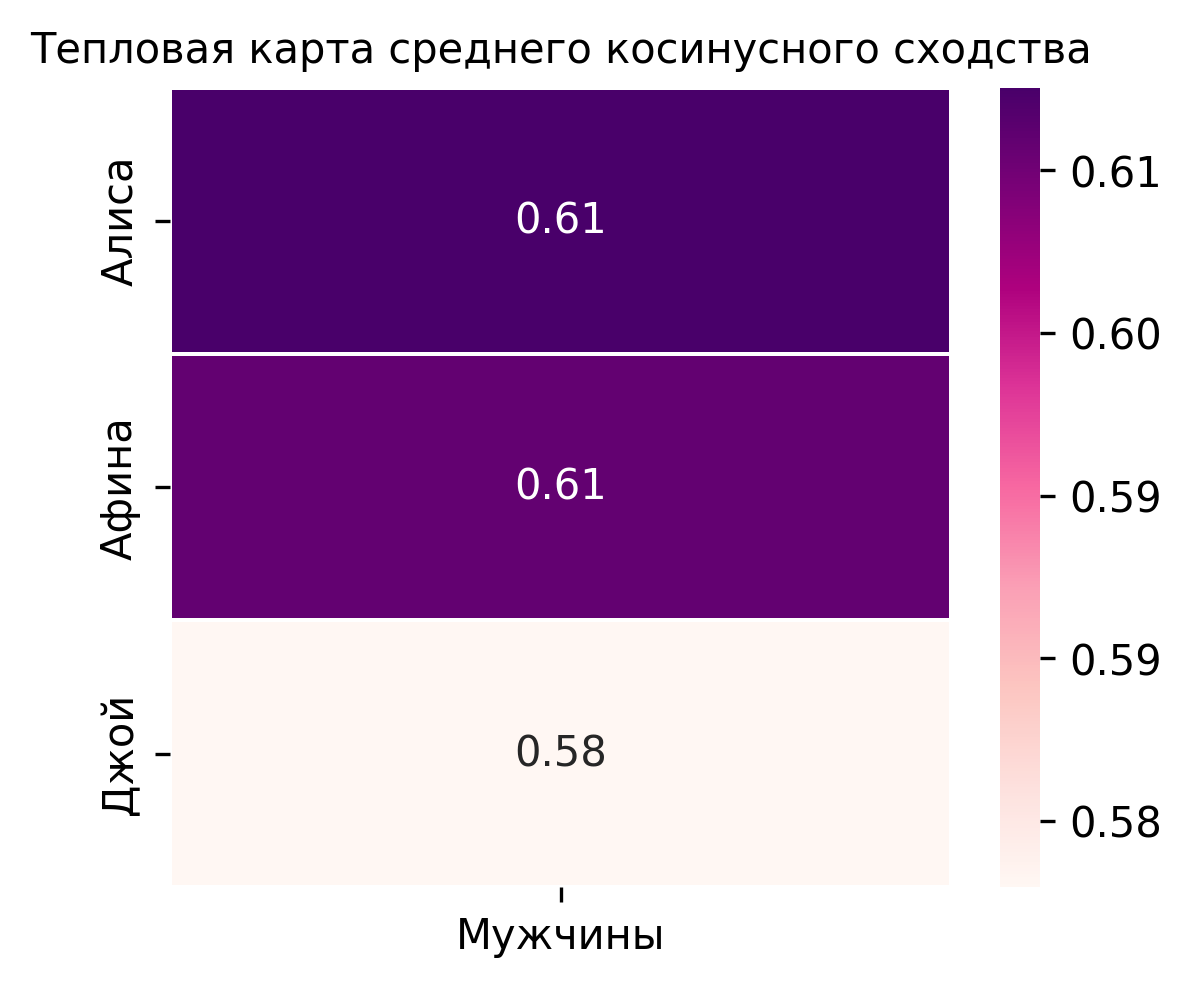

In [ ]:
rows = ['Алиса', 'Афина', 'Джой']
columns = ['Мужчина_1', 'Мужчина_2']

average = np.array([[data[f"{y}_{x}"].mean() for x in columns] for y in rows]).reshape(3, 2)
average = np.mean(average, axis=1).reshape(3, 1)
columns = ['Мужчины']
path = "new_data/average_by_all_men_girls"
cmap = "RdPu"
plot_heatmap(average, rows, columns, cmap, path)


In [ ]:
rows = ['Алиса', 'Афина', 'Джой']
columns = ['Мужчина_1', 'Мужчина_2']

average = np.array([[data[f"{y}_{x}"].mean() for x in columns] for y in rows]).reshape(3, 2)
average = np.mean(average, axis=1)
average

array([0.60905855, 0.60705376, 0.57955986])

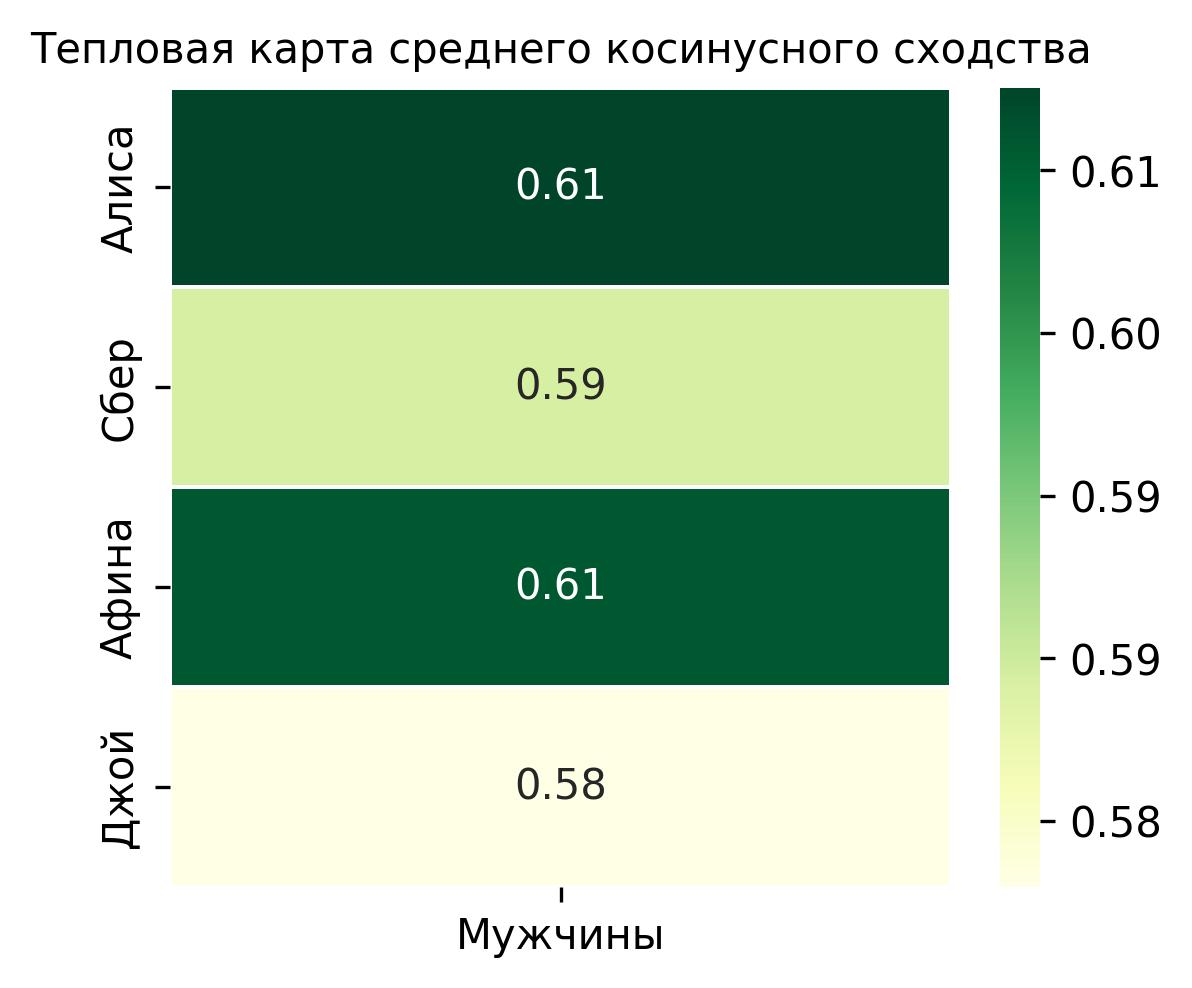

In [ ]:
plt.figure(figsize=(4.2, 3.46), dpi=300)
average = np.array([data[['Алиса_Мужчина_1', 'Алиса_Мужчина_2']].mean().mean(), data[['Сбер_Мужчина_1', 'Сбер_Мужчина_2']].mean().mean(), data[['Афина_Мужчина_1', 'Афина_Мужчина_2']].mean().mean(), data[['Джой_Мужчина_1', 'Джой_Мужчина_2']].mean().mean()]).reshape(4, 1)
rows = ['Алиса', 'Сбер', 'Афина', 'Джой']
columns = ['Мужчины']

sns.heatmap(average,
            linewidth=.5,
            xticklabels=columns,
            yticklabels=rows,
            annot=True,
            cmap="YlGn")
cbar = plt.gcf().axes[-1]
cbar.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
cbar.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5))

plt.title('Тепловая карта среднего косинусного сходства', fontsize=10)
plt.savefig(f'average_by_all_men.png')

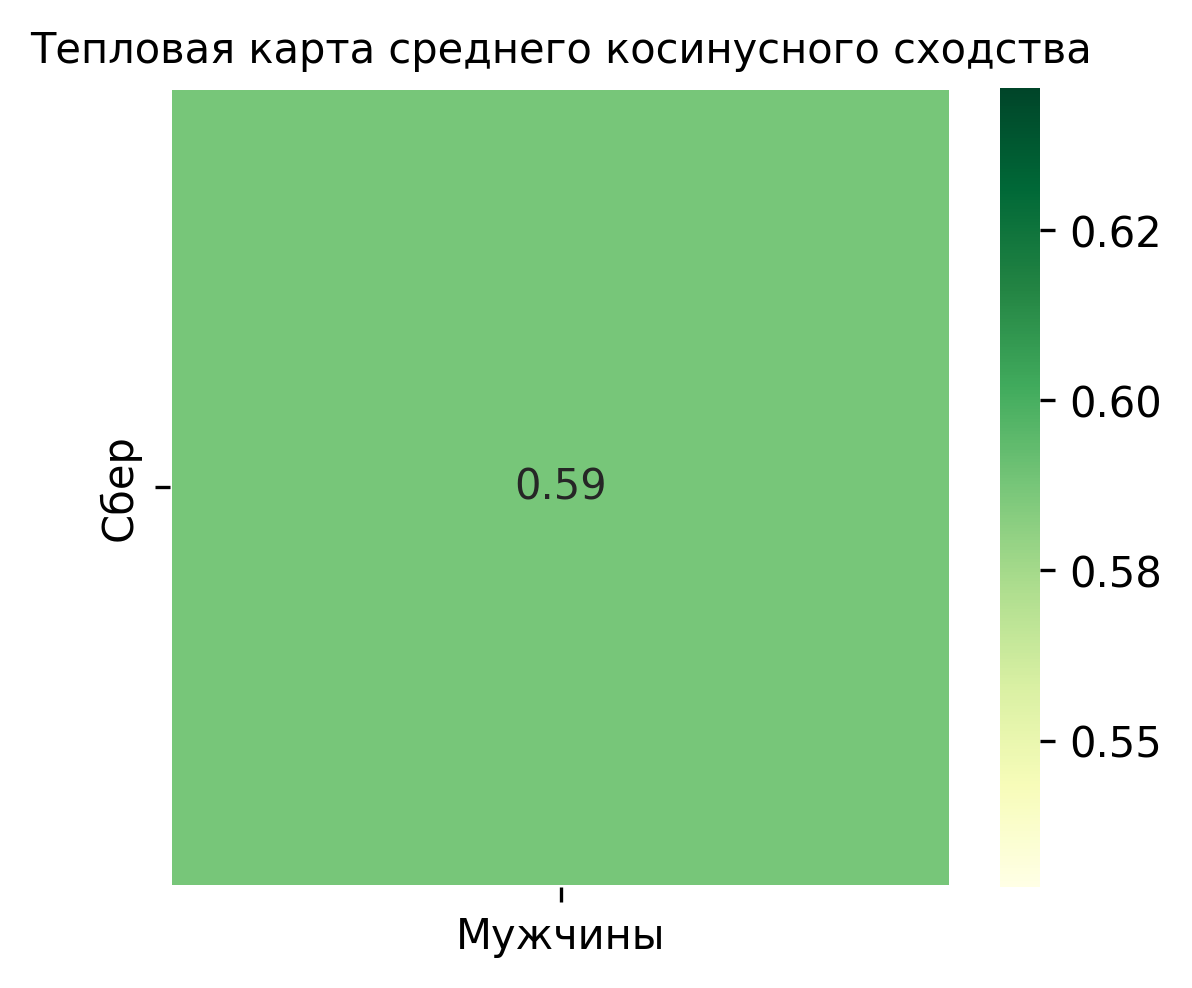

In [ ]:
plt.figure(figsize=(4.2, 3.46), dpi=300)
average = np.array(data[['Сбер_Мужчина_1', 'Сбер_Мужчина_2']].mean().mean()).reshape(1, 1)
rows = ['Сбер']
columns = ['Мужчины']
sns.heatmap(average,
            linewidth=.5,
            xticklabels=columns,
            yticklabels=rows,
            annot=True,
            cmap="YlGn")
cbar = plt.gcf().axes[-1]
cbar.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
cbar.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5))

plt.title('Тепловая карта среднего косинусного сходства', fontsize=10)
plt.savefig(f'average_by_all_men_sber.png')

Изобразим плотности распределения величины косинусного расстояния между ответами голосовых ассистентов и мужчин респондентов.

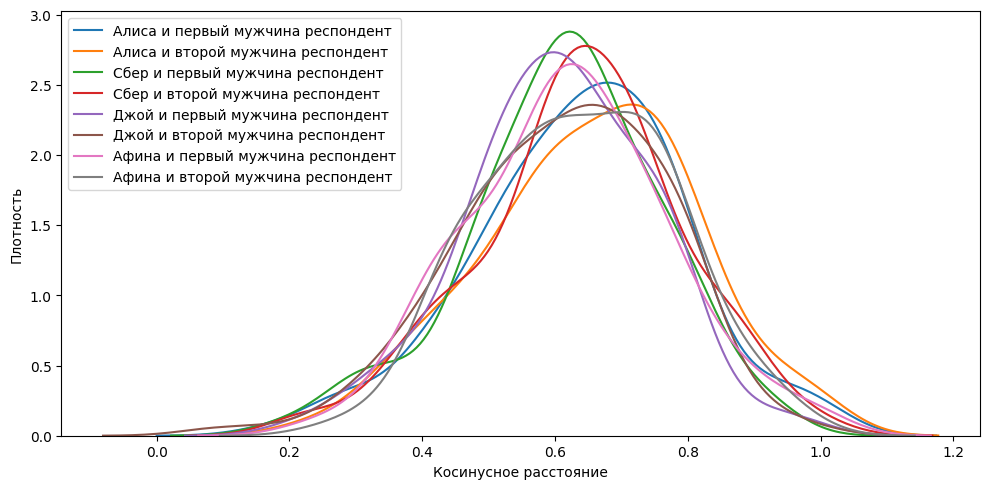

In [ ]:
columns = data.select_dtypes(include=['float']).columns
names = ["Алиса и первый мужчина респондент",
         "Алиса и второй мужчина респондент",
         "Сбер и первый мужчина респондент",
         "Сбер и второй мужчина респондент",
         "Джой и первый мужчина респондент",
         "Джой и второй мужчина респондент",
         "Афина и первый мужчина респондент",
         "Афина и второй мужчина респондент",
         ]

plt.figure(figsize=(10, 5))
for idx, label in enumerate(columns):
  sns.kdeplot(data[label], label=names[idx])

plt.legend()
plt.xlabel("Косинусное расстояние")
plt.ylabel("Плотность")
plt.tight_layout()